##  Part I: EDA | Jupyter Notebook 


## Final Project Submission

Please fill out:
* __Student name:__ Sharonda Pettiett-Warner
* __Student pace:__ part time - PT_0610
* __Scheduled project review date/time:__ Jan 28, 2020
* __Instructor name:__ Eli Thomas

# Begin Study

> In this notebook I will perform EDA Analysis to understand the patterns, trends and metrics on the hotel bookings dataset.

In [1]:
import datetime
start = datetime.datetime.now()

### Import Libraries

In [2]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

### Load Dataset

> __Kaggle Kernel__
- Hotel Booking Demand Datasets: Nuno Antonio, Ana Almeida, Luis Nunes, Data in Brief, 2019.

In [4]:
dataset = pd.read_csv('./hotel_bookings.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
dataset.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
dataset.shape

(119390, 32)

In [7]:
# Check datatypes, # rows and columns, missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

# Data Cleaning (Basic)

In [8]:
# Convert to datetime data type
dataset['reservation_status_date'] = pd.to_datetime(dataset['reservation_status_date'], infer_datetime_format=True)

In [9]:
# Add column to capture day of week - 0 (Monday) to 6 (Sunday)
dataset['day_of_week'] = dataset['reservation_status_date'].apply(lambda time: time.dayofweek)

In [10]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,day_of_week
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,3
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,3
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,4


# EDA

#### Data Statistics

In [11]:
# To view statistical properties of numerical variables:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,day_of_week
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2.885267
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,1.984289
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,1.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,6.000000


In [12]:
# To view the statistical properties of character variables:
dataset.describe(include=['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


#### Histogram of dataset

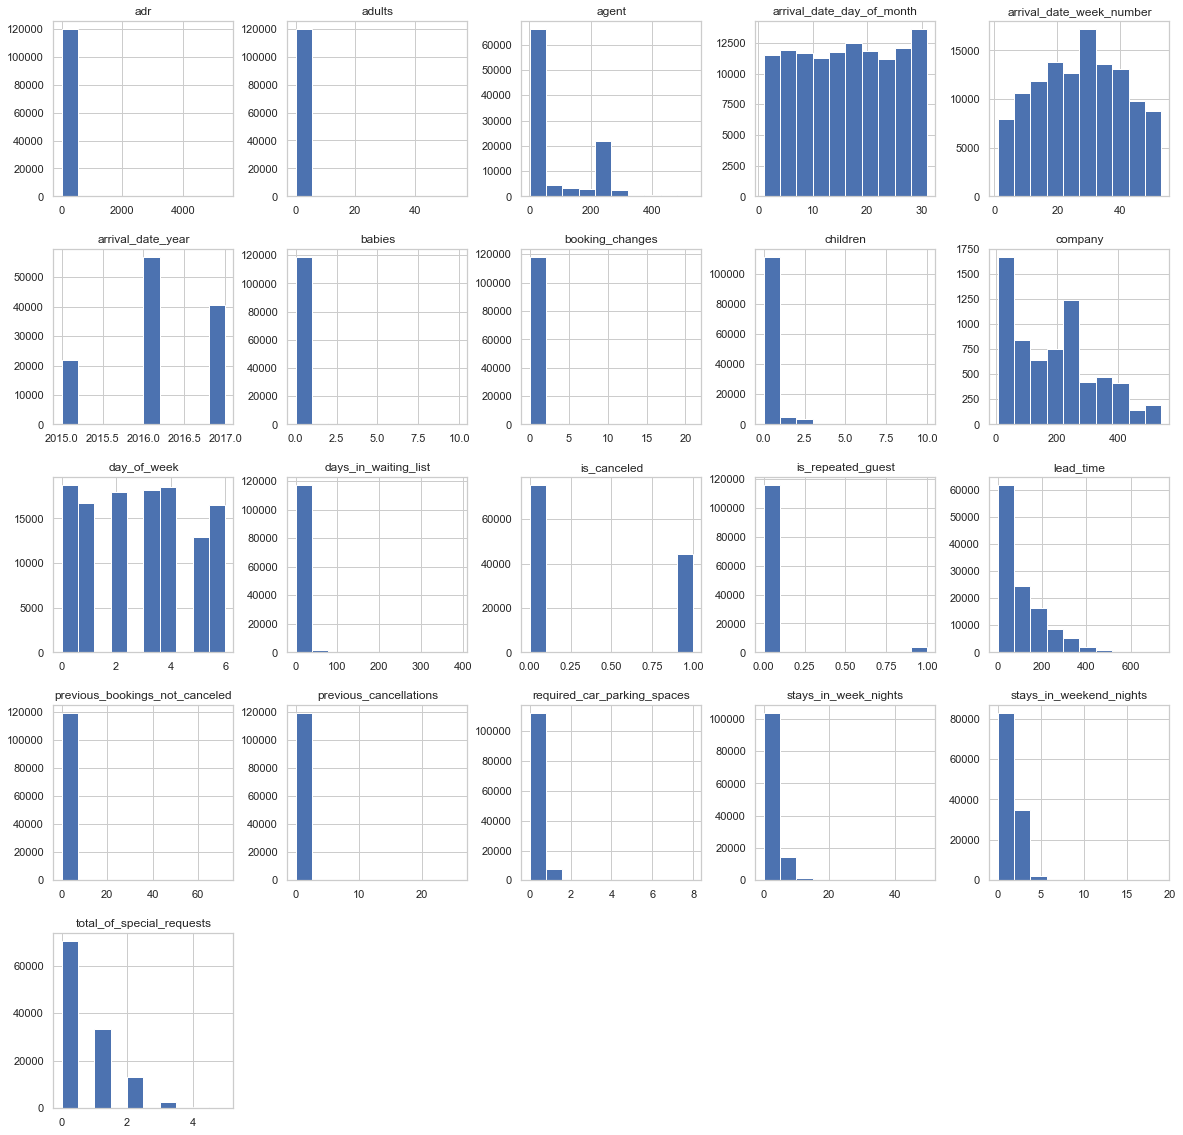

In [13]:
dataset.hist(figsize=(20,20))
plt.show()

#### Outlier Detection

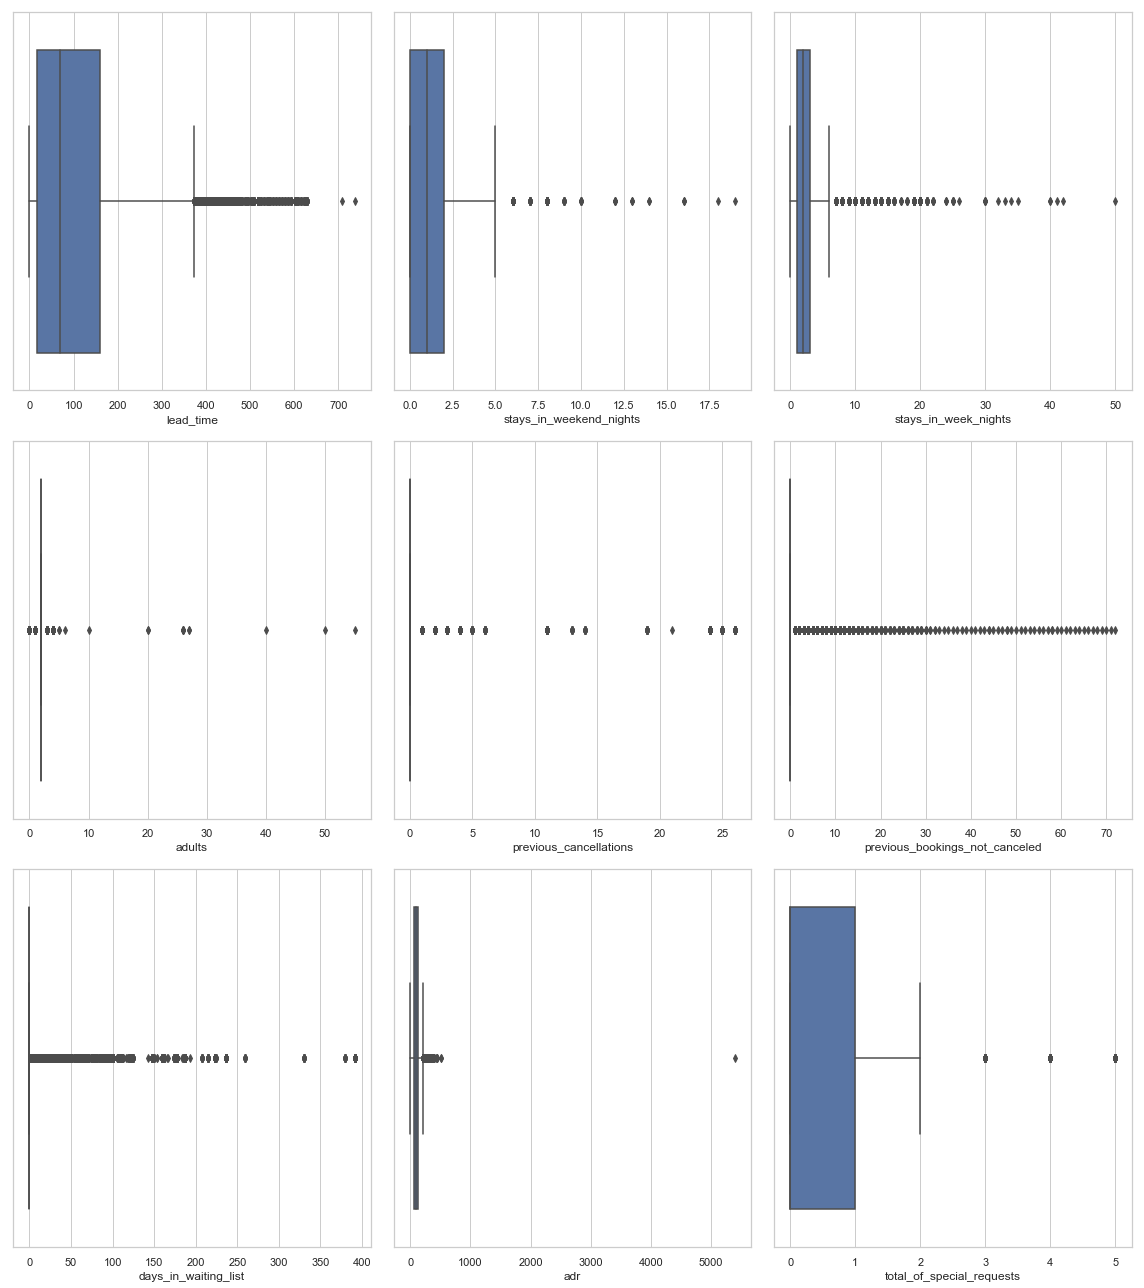

In [14]:
# Creating a boxplot for Outlier detection
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'previous_cancellations', 'previous_bookings_not_canceled',
            'days_in_waiting_list', 'adr', 'total_of_special_requests']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(3,3,n)
    sns.boxplot(dataset[feature])
    n+=1
    plt.tight_layout()

__Drop ADR Outlier__

In [15]:
dataset['adr'].max()

5400.0

In [16]:
dataset.loc[dataset['adr']==5400]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,day_of_week
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19,4


In [17]:
dataset.drop(dataset.index[48515], inplace=True)

## Pandas Profiling

In [18]:
# !pip install pandas-profiling

In [19]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(dataset)
profile

In [20]:
profile = profile.to_file(output_file='Booking Cancellation Profile - ML.html')

#### Observations: Pandas Profiling 
- (Review Report Output)

#### Observations: EDA 
- Outliers detected in dataset for continuous variables.
- Many object data type columns, could be represented by categorical columns
- Convert reservation_status_date to datetime dtype.
- Dataset contains 12 categorical variables and 20 numerical variables.
- TARGET: is_canceled is the target variable.

# Visualization

## Data Questions

Topics covered and questions to answer from the data:

- Where do the guests come from?
- How much do guests pay for a room per night?
- Which are the most busy month?
- Bookings by market segment
- How many bookings were canceled?
- Which month have the highest number of cancelations?
- Which hotel has more cancelations?
- Any difference in lead time?
- Any difference in market segments?
- How about distribution channels?
- How about Month, Day, and Week Number?

## Graphs

#### Plot pairwise relationships in a dataset

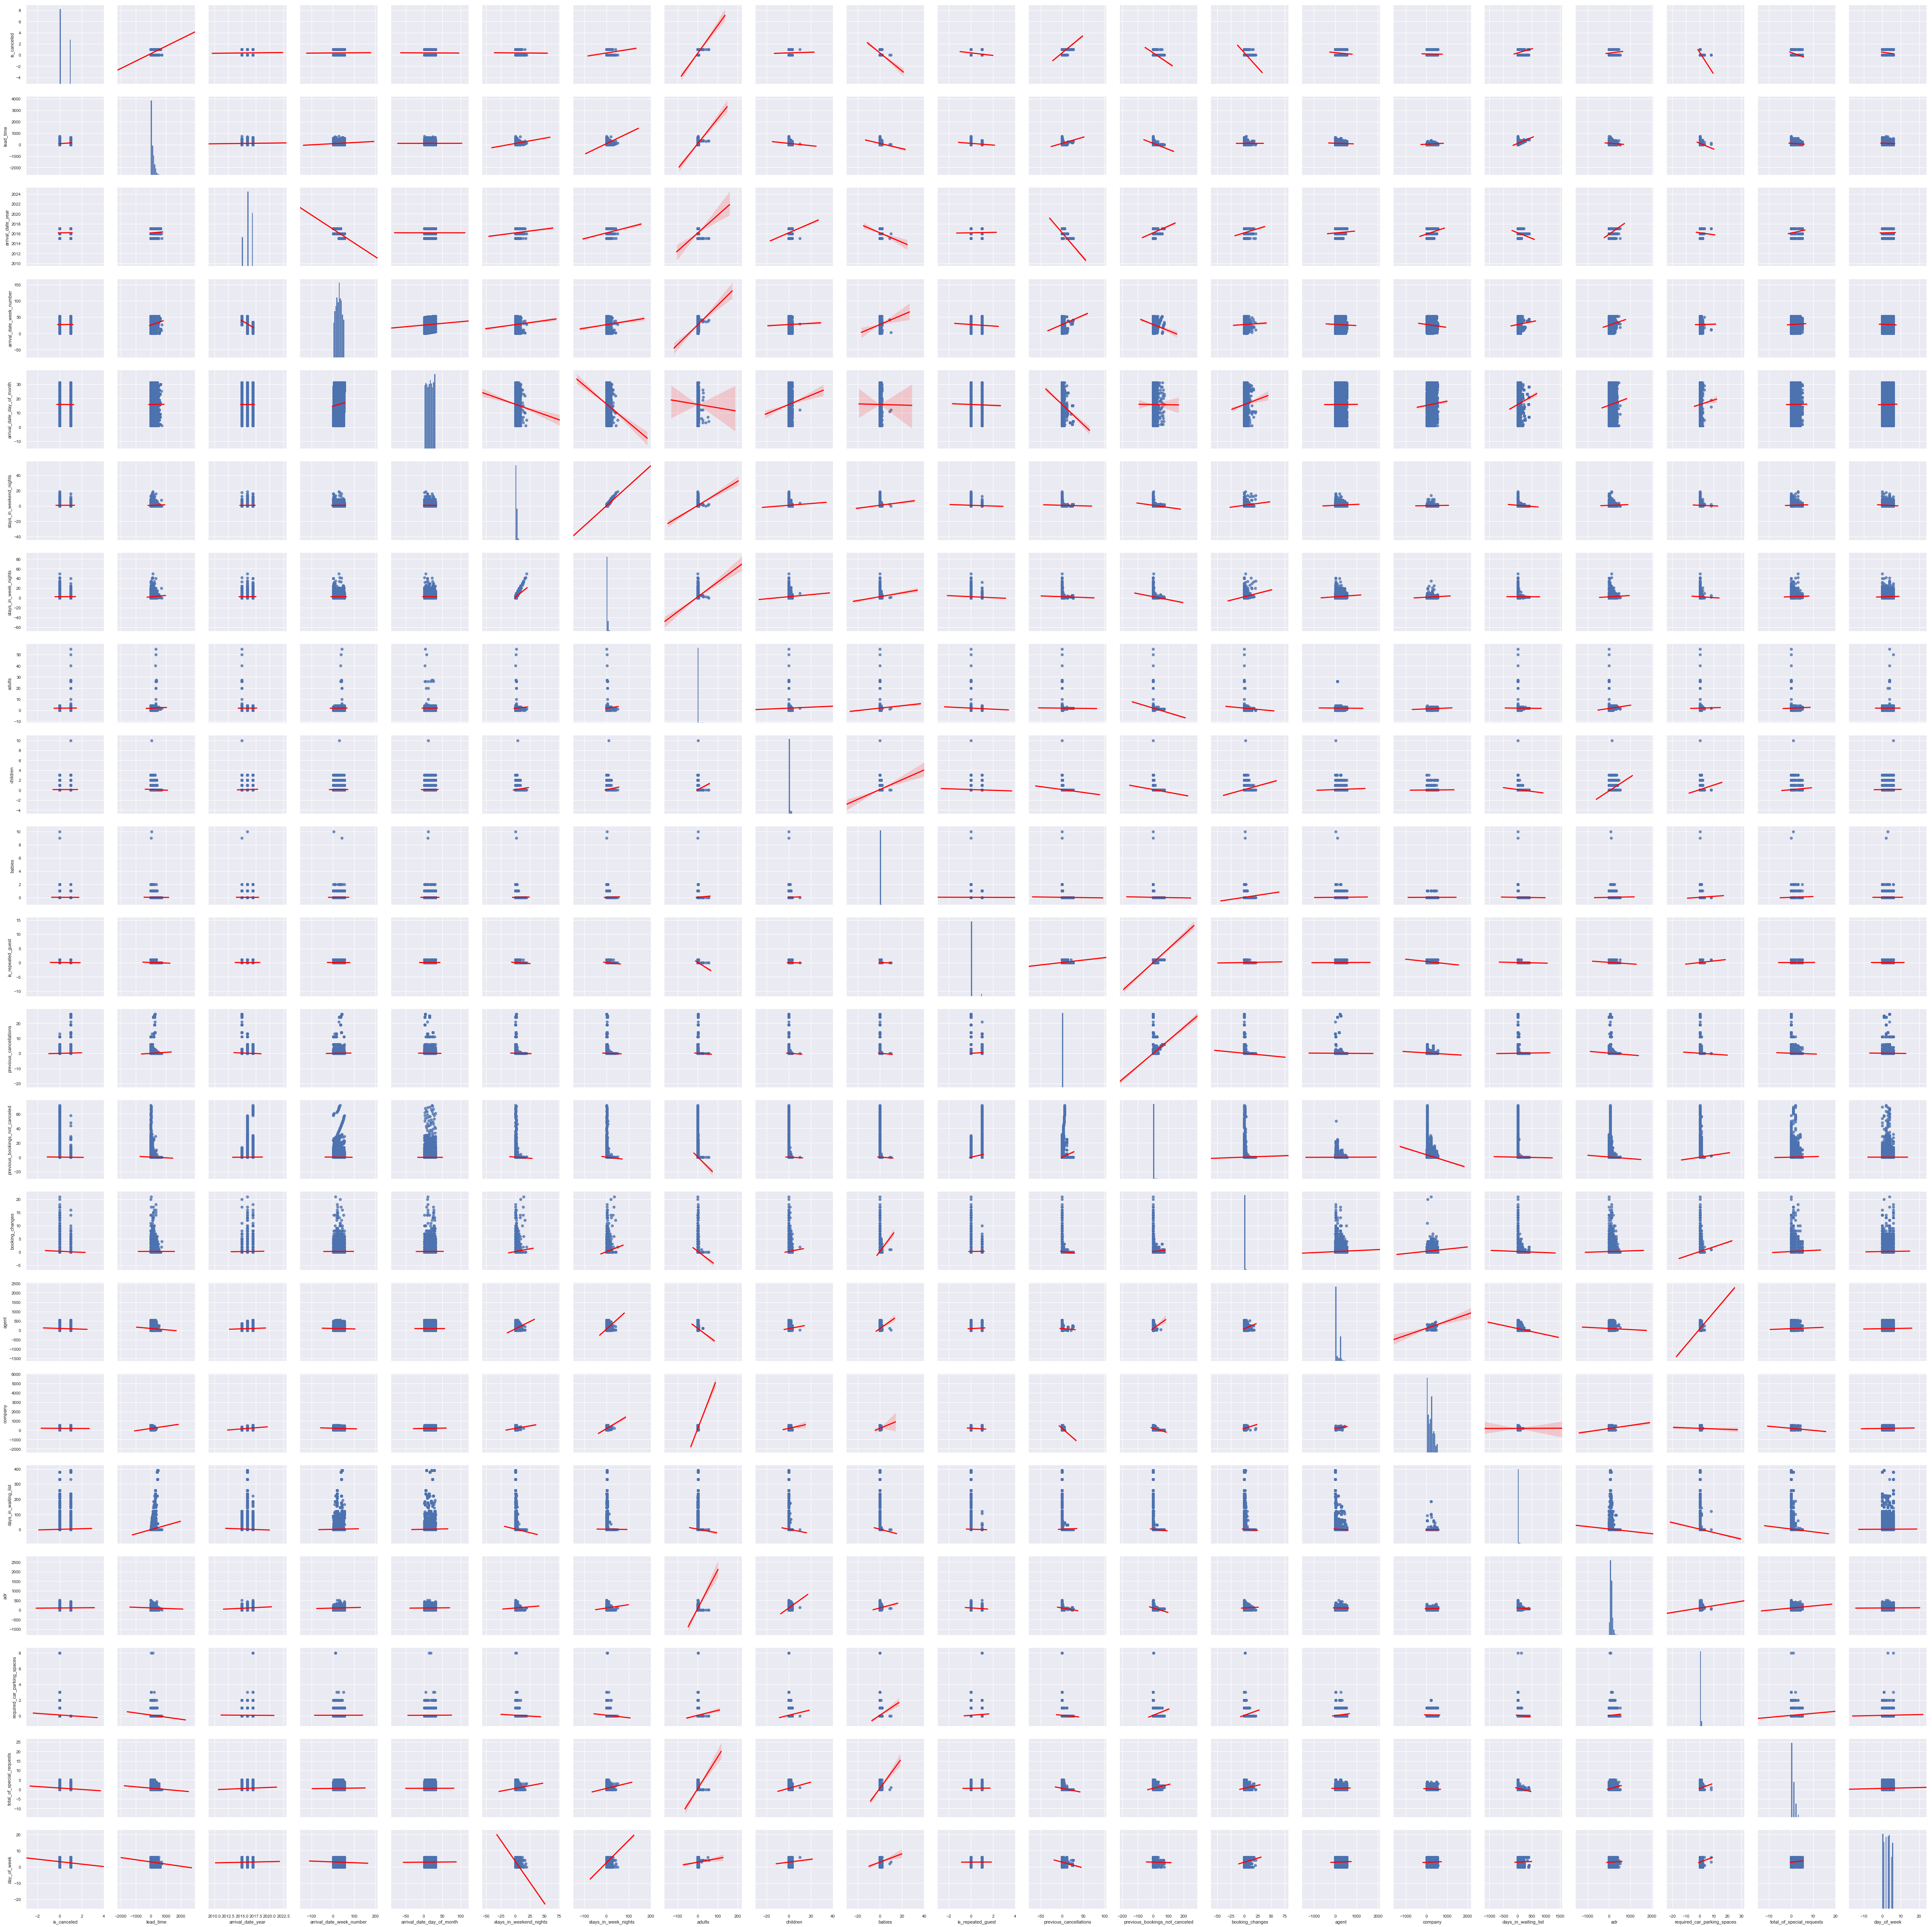

In [21]:
# figure = plt.figure(figsize=(6,8))
sns.pairplot(dataset, kind="reg", size=3,plot_kws={'line_kws':{'color':'red'}});

#### Target Analysis

> __How many bookings were canceled?__
- __Answer:__ 37% or 44,224 out of 119,390 entries.

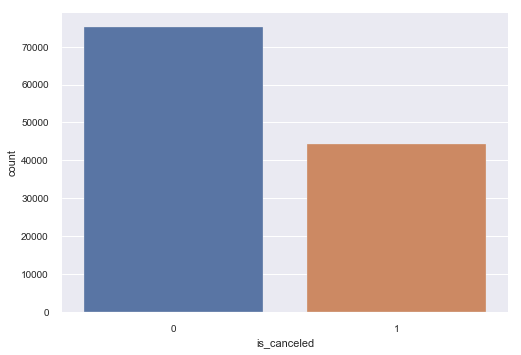

In [22]:
# Evaluate Target Values
sns.countplot(dataset['is_canceled'])

plt.savefig('./PPT_IMG/target_distribution')
plt.show()

In [23]:
dataset['is_canceled'].value_counts()

0    75166
1    44223
Name: is_canceled, dtype: int64

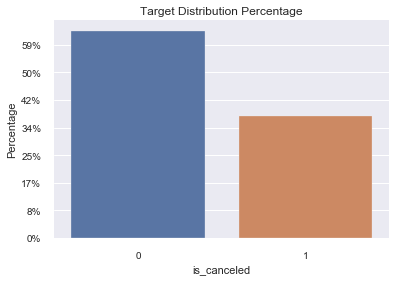

In [24]:
# Target  (Percentage)
fig = plt.figure(figsize=(6,4))
ax=sns.countplot(dataset['is_canceled'], orient='h')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(dataset)))
ax.set_title('Target Distribution Percentage')
ax.set_ylabel('Percentage')

plt.savefig('./PPT_IMG/target_distribution_percnt')
plt.show()

In [25]:
dataset['is_canceled'].value_counts(normalize=True)

0    0.629589
1    0.370411
Name: is_canceled, dtype: float64

> __TARGET:__ Dataset contains a distribution of __37 %__ entries labeled as booking cancellations and __63%__ entries labeled as successful bookings.

#### Predictor Leakage Column(s)

In [26]:
dataset['reservation_status'].value_counts()

Check-Out    75166
Canceled     43016
No-Show       1207
Name: reservation_status, dtype: int64

In [27]:
dataset['reservation_status'].value_counts(normalize = True)

Check-Out    0.629589
Canceled     0.360301
No-Show      0.010110
Name: reservation_status, dtype: float64

> Data Leakage (Predictor Leakage): reservation_status and is_canceled provide the same information.

#### Hotel Analysis

> __Which hotel has more cancelations?__
- __Answer:__ City Hotel

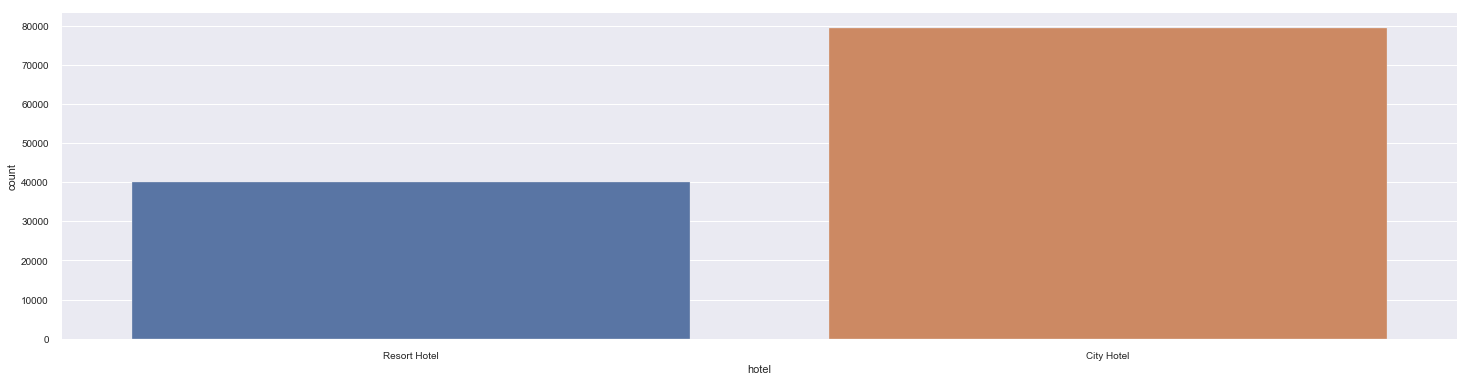

In [28]:
# Hotel Distribution
fig = plt.figure(figsize=(25,6))
sns.countplot(dataset['hotel'], orient='h')

plt.savefig('./PPT_IMG/hotel_distribution')
plt.show()

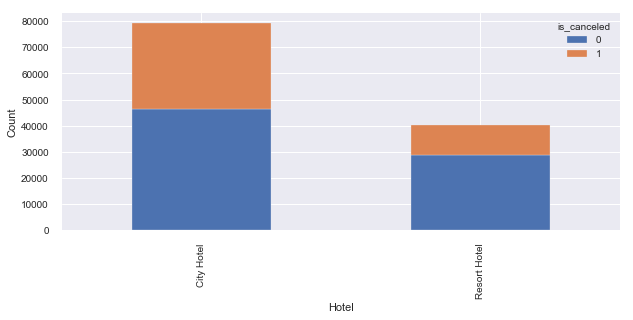

In [29]:
# Plot count of hotel per is_canceled class
df_hotel_is_canceled = dataset.groupby(['hotel'])['is_canceled'].value_counts(normalize=False).unstack()
df_hotel_is_canceled.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Hotel')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/hotel_per_is_canceled_class')
plt.show()

#### Arrival Month Analysis

> __Which month(s) have the highest number of cancellations?__
- __Answer:__ August, July

> __Which month(s) have the highest number of bookings?__
- __Answer:__ August, July

> __Which month(s) are the "most" busiest?__
- __Answer:__ August, July, May

> __Which month(s) are the "least" busiest?__
- __Answer:__ Nov, Dec, Jan, Feb

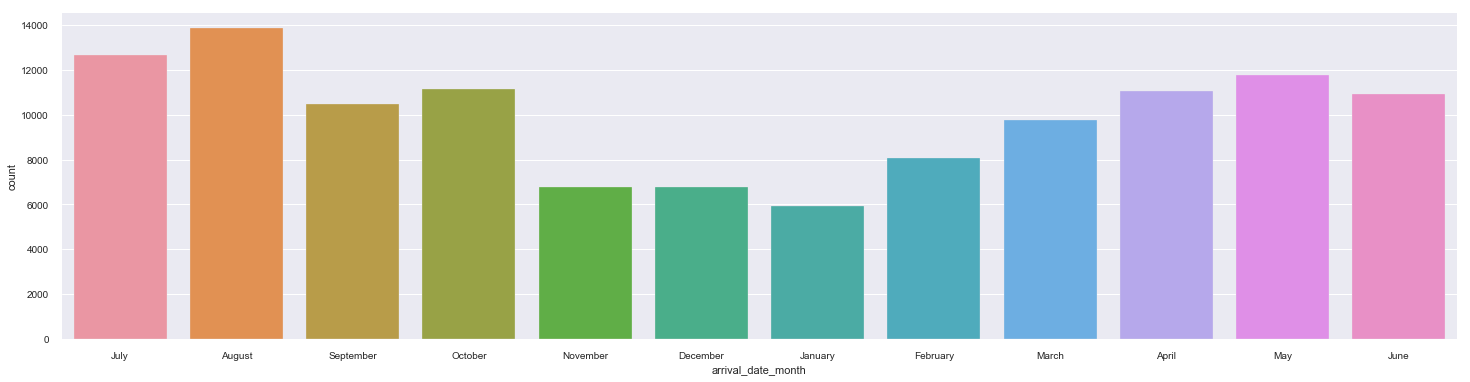

In [30]:
# Arrival Month Distribution
fig = plt.figure(figsize=(25,6))
sns.countplot(dataset['arrival_date_month'], orient='h')

plt.savefig('./PPT_IMG/arrival_month_distribution')
plt.show()

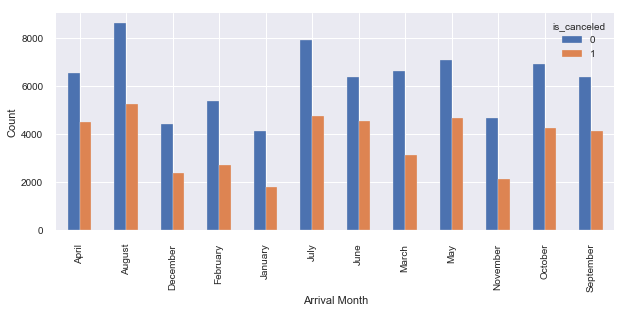

In [31]:
# Plot count of arrival month per is_canceled class
df_arrmonth_is_canceled = dataset.groupby(['arrival_date_month'])['is_canceled'].value_counts(normalize=False).unstack()
df_arrmonth_is_canceled.plot(kind='bar',stacked=False, legend=True,figsize=(10, 4))
plt.xlabel('Arrival Month')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/arrival_month_per_is_canceled_class')
plt.show()

#### Arrival Year Analysis
> Which was the busiest year? __2016__

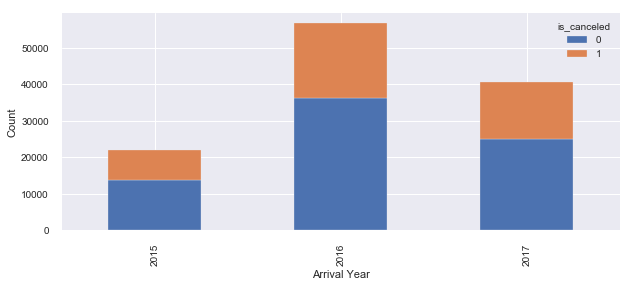

In [32]:
# Plot year by is_canceled class
df_year_is_canceled = dataset.groupby(['arrival_date_year'])['is_canceled'].value_counts(normalize=False).unstack()
df_year_is_canceled.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Arrival Year')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/arrival_year_per_is_canceled_class')
plt.show()

#### Customer Type Analysis

> __Which customer type has the "most" booking and cancelations?__
- __Answer:__ Transient

> __Which customer type has the "least" booking and cancelations?__
- __Answer:__ Group

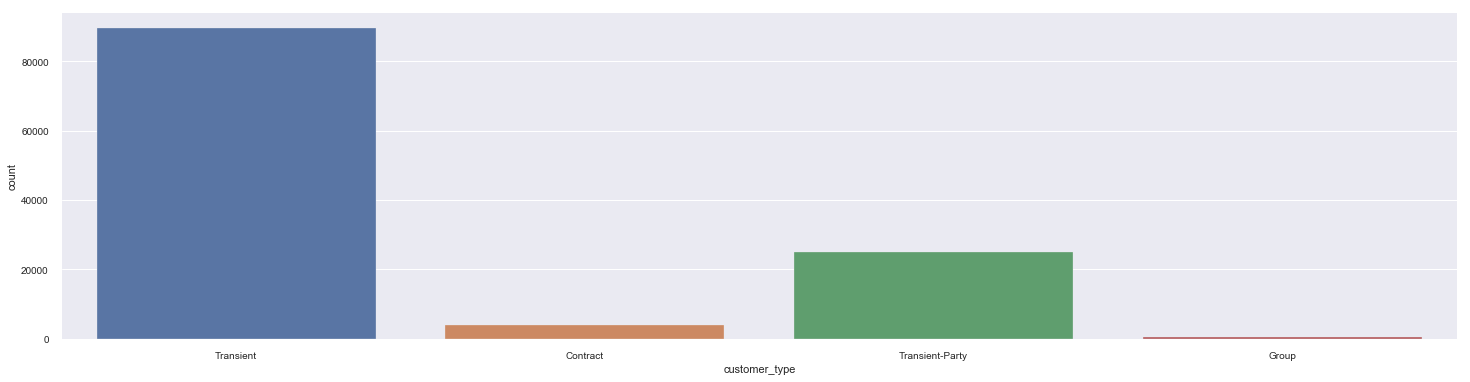

In [33]:
# Customer Type Distribution
fig = plt.figure(figsize=(25,6))
sns.countplot(dataset['customer_type'], orient='h')

plt.savefig('./PPT_IMG/customer_type_distribution')
plt.show()

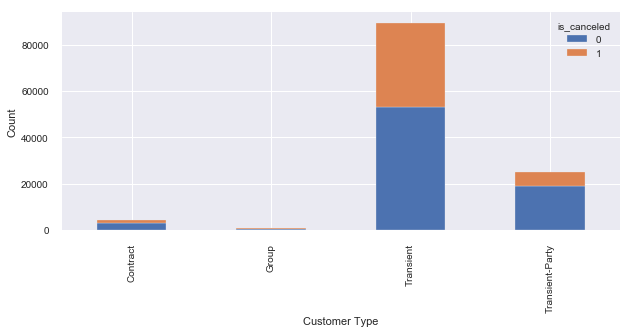

In [34]:
# Plot count of customer type per is_canceled class
df_custype_is_canceled = dataset.groupby(['customer_type'])['is_canceled'].value_counts(normalize=False).unstack()
df_custype_is_canceled.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Customer Type')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/customer_type_per_is_canceled_class')
plt.show()

In [35]:
# Cancellations by Customer Type (Count)
cust_type = dataset[dataset.is_canceled == 1].groupby('customer_type').customer_type.count().sort_values(ascending = False)
cust_type

customer_type
Transient          36513
Transient-Party     6389
Contract            1262
Group                 59
Name: customer_type, dtype: int64

In [36]:
# Cancellations by Customer Type (Count)
dataset['customer_type'][dataset['is_canceled']==1].value_counts()

Transient          36513
Transient-Party     6389
Contract            1262
Group                 59
Name: customer_type, dtype: int64

In [37]:
# Cancellations by Customer Type (Percentage)
dataset['customer_type'].value_counts(normalize = True)

Transient          0.750588
Transient-Party    0.210438
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

#### Market Segment Analysis

> __Which market segment has the most bookings?__
- __Answer:__ Online TA

> __Which market segment has the most cancellations?__
- __Answer:__ Online TA = 47% followed by Groups = 27%

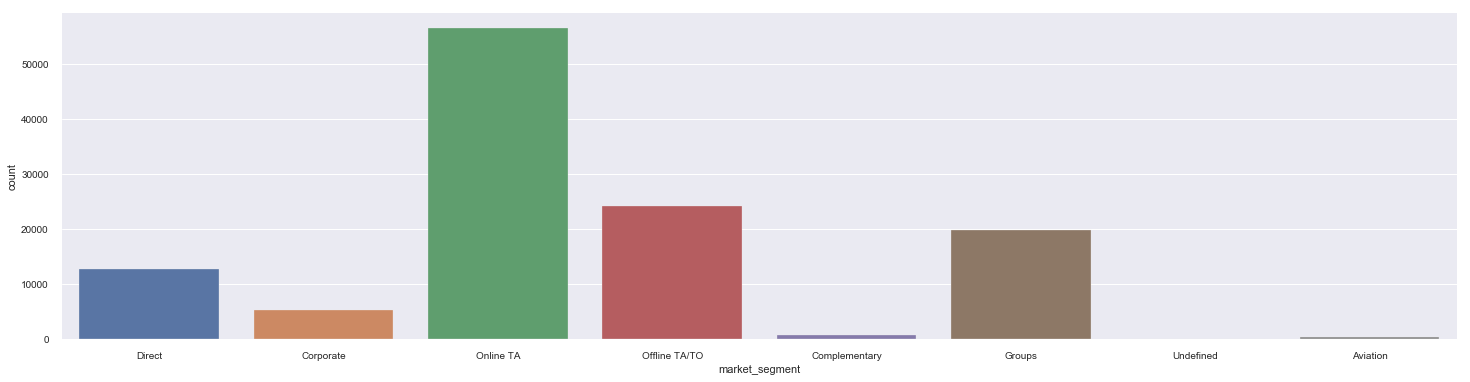

In [38]:
# Market Segment -- COUNT
fig = plt.figure(figsize=(25,6))
sns.countplot(dataset['market_segment'], orient='h')

plt.savefig('./PPT_IMG/market_segment_count')
plt.show()

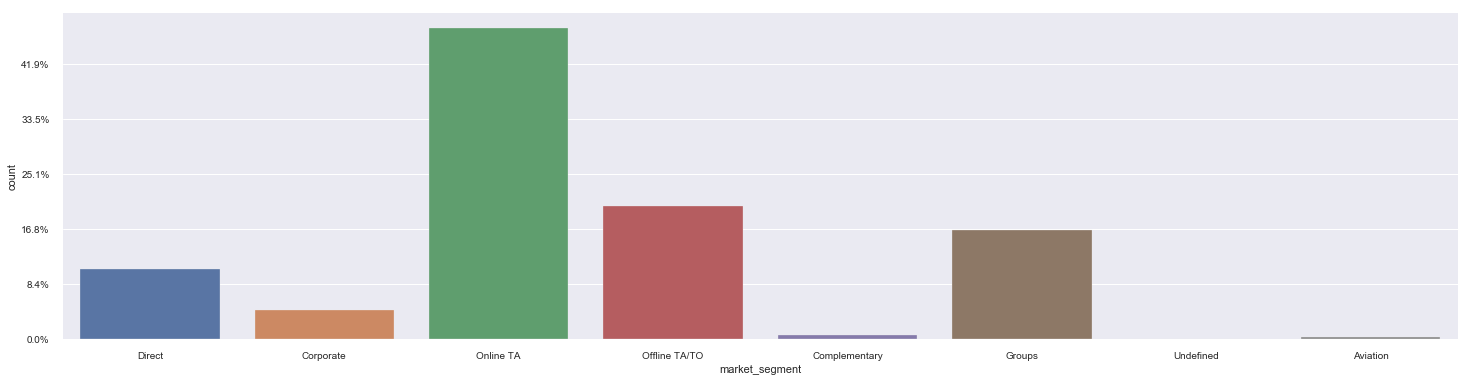

In [39]:
# Market Segment  -- PERCENTAGE
fig = plt.figure(figsize=(25,6))
ax=sns.countplot(dataset['market_segment'], orient='h')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(dataset)))

plt.savefig('./PPT_IMG/market_segment_percnt')
plt.show()

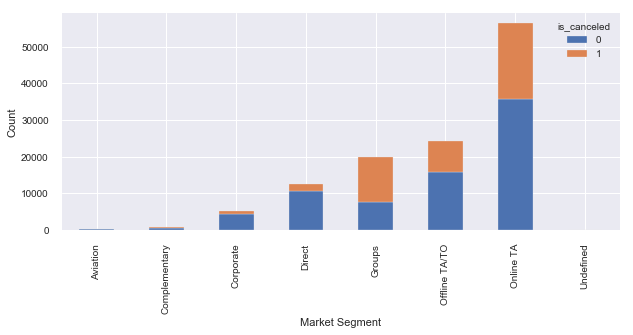

In [40]:
# Plot market segment by is_canceled class
df_mktseg_is_canceled = dataset.groupby(['market_segment'])['is_canceled'].value_counts(normalize=False).unstack()
df_mktseg_is_canceled.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Market Segment')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/market_segment_per_is_canceled_class')
plt.show()

In [41]:
# Cancellations by Market Segment (Percentage)
mkt_seg_cancl = dataset['market_segment'][dataset['is_canceled']==1].value_counts(normalize = True)
mkt_seg_cancl

Online TA        0.468964
Groups           0.273545
Offline TA/TO    0.187911
Direct           0.043733
Corporate        0.022432
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: market_segment, dtype: float64

#### Deposit Type Analysis

> __Would Deposit Type makes a difference?__
- __Answer:__ Most are No Deposit, however, Non-refund did not seem to deter cancellations,as very few successful booking were made with deposit type = Non-Refund, as shown below in the graph and table.

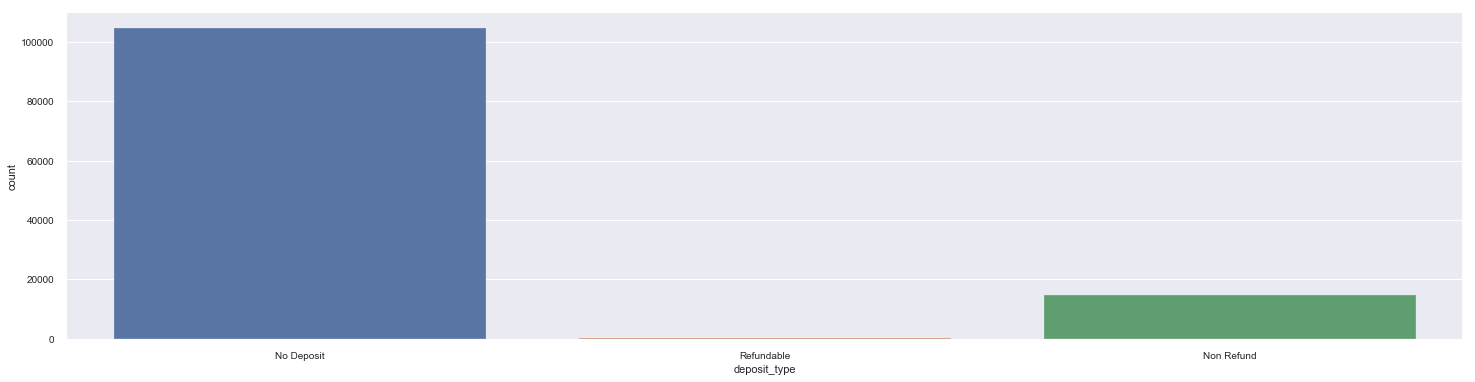

In [42]:
# Deposit Type 
fig = plt.figure(figsize=(25,6))
sns.countplot(dataset['deposit_type'], orient='h')

plt.savefig('./PPT_IMG/deposit_type_distribution')
plt.show()

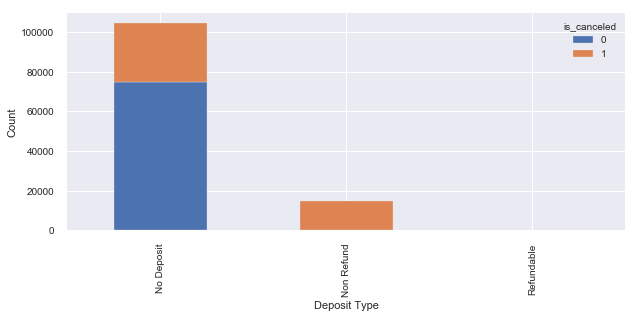

In [43]:
# Plot count of deposit type per is_canceled class
df_mktseg_is_canceled = dataset.groupby(['deposit_type'])['is_canceled'].value_counts(normalize=False).unstack()
df_mktseg_is_canceled.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Deposit Type')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/deposit_type_per_is_canceled_class')
plt.show()

In [44]:
# Cancellations by Deposit Type (Count)
dep_type = dataset[dataset.is_canceled == 1].groupby('deposit_type').deposit_type.count().sort_values(ascending = False)
dep_type

deposit_type
No Deposit    29694
Non Refund    14493
Refundable       36
Name: deposit_type, dtype: int64

In [45]:
# Successfl bookings by Deposit Type (Count)
dep_type = dataset[dataset.is_canceled == 0].groupby('deposit_type').deposit_type.count().sort_values(ascending = False)
dep_type

deposit_type
No Deposit    74947
Refundable      126
Non Refund       93
Name: deposit_type, dtype: int64

#### Channel Distribution Analysis

> __Which distribution channel has the most bookings?__
- __Answer:__  TA/TO

> __Which distribution channel has the most cnncellations?__
- __Answer:__  TA/TO

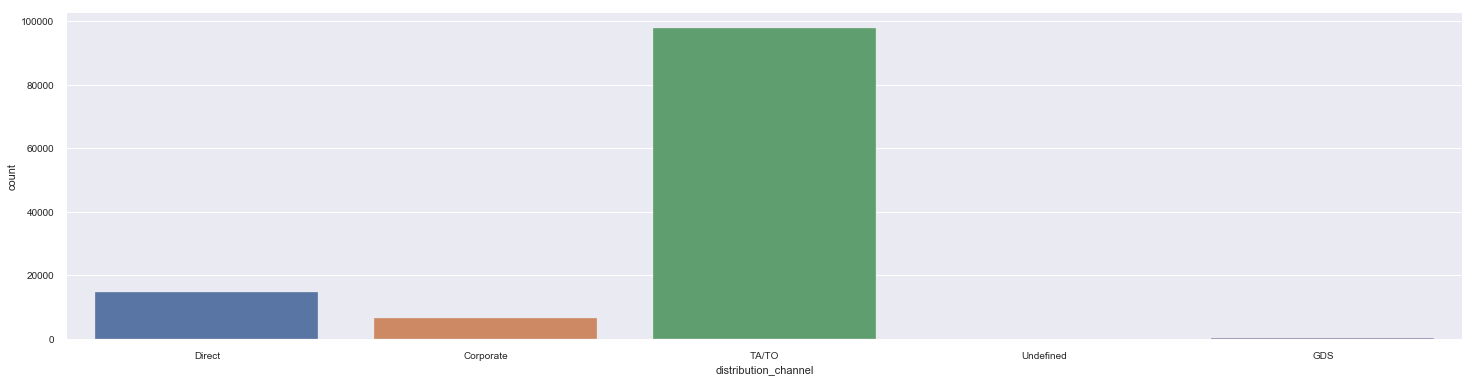

In [46]:
# Channel Distribution
fig = plt.figure(figsize=(25,6))
sns.countplot(dataset['distribution_channel'], orient='h')

plt.savefig('./PPT_IMG/channel_distribution')
plt.show()

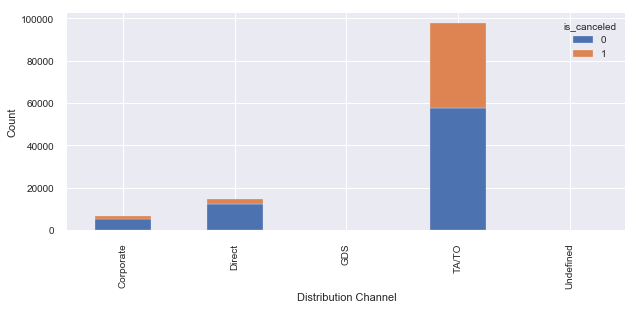

In [47]:
# Plot count of channel distribution per is_canceled class
df_distchan_is_canceled = dataset.groupby(['distribution_channel'])['is_canceled'].value_counts(normalize=False).unstack()
df_distchan_is_canceled.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Distribution Channel')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/distribution_channel_per_is_canceled_class')
plt.show()

In [48]:
# Cancellations by Distribution Channel (Percentage)
dataset['distribution_channel'][dataset['is_canceled']==1].value_counts(normalize = True)

TA/TO        0.907921
Direct       0.057821
Corporate    0.033331
GDS          0.000837
Undefined    0.000090
Name: distribution_channel, dtype: float64

#### Country Analysis

> __Which country did the guests come from that canceled their reservations the most?__
- __Answer:__ PRT

> __Where do the guests come from?__
- __Answer:__ PRT, GBR, FRA, ESP, DEU

In [49]:
# List of countries with per is_canceled class (Count)
dataset.groupby(['country'])['is_canceled'].value_counts(normalize=False)[:10]

country  is_canceled
ABW      0                2
AGO      1              205
         0              157
AIA      0                1
ALB      0               10
         1                2
AND      1                5
         0                2
ARE      1               43
         0                8
Name: is_canceled, dtype: int64

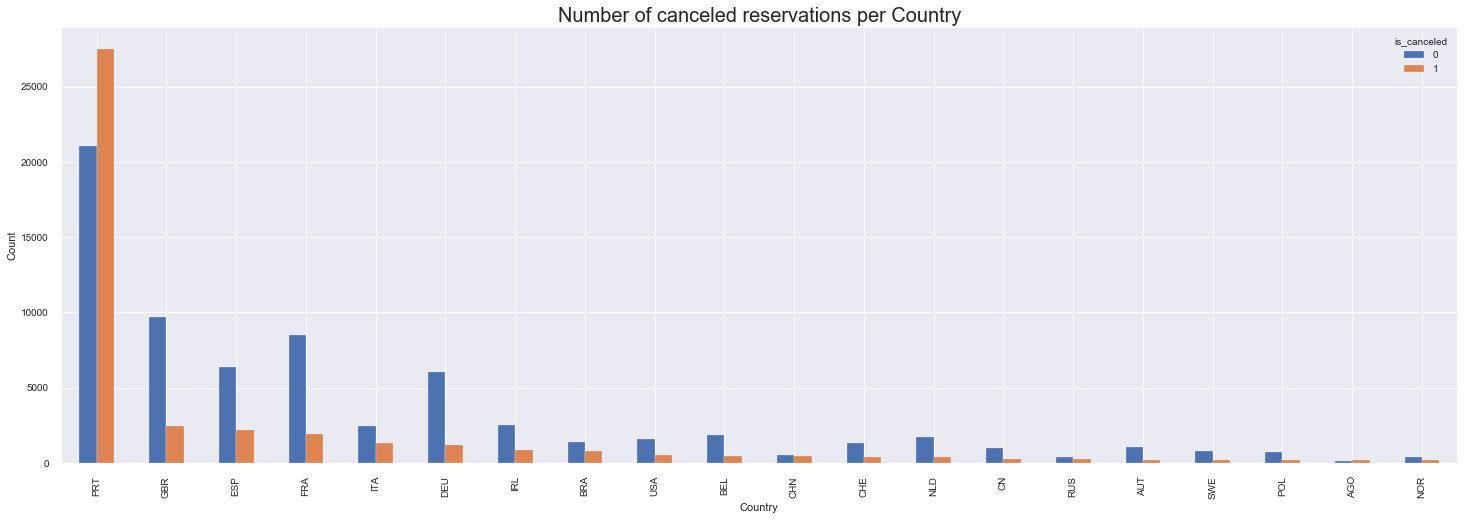

In [50]:
# Plot count of country distribution per is_canceled class (Top 20)
df_country_is_canceled = dataset.groupby(['country'])['is_canceled'].value_counts(normalize=False).unstack()
most_is_cancl_country = pd.DataFrame(df_country_is_canceled)
most_is_cancl_country = most_is_cancl_country.sort_index(by=[1], ascending=False, axis=0)
most_is_cancl_country.head(20).plot(kind='bar',stacked=False, legend=True,figsize=(25, 8))
plt.title('Number of canceled reservations per Country', fontdict={'fontsize': 20})
plt.xlabel('Country')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/country_per_is_canceled_class-1')
plt.show()

is_canceled,0,1
country,,
PRT,21071.0,27518.0
GBR,9676.0,2453.0
ESP,6391.0,2177.0
FRA,8481.0,1934.0
ITA,2433.0,1333.0
DEU,6069.0,1218.0
IRL,2543.0,832.0
BRA,1394.0,830.0
USA,1596.0,501.0


<Figure size 1080x360 with 0 Axes>

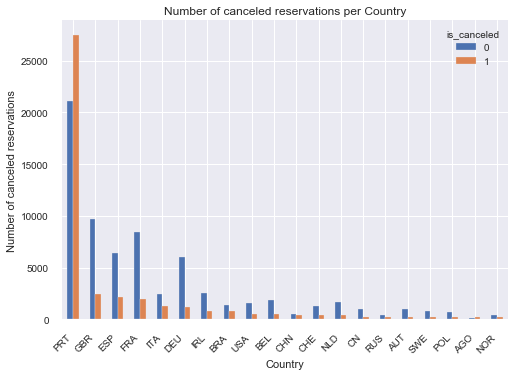

In [51]:
# Country were the guests who canceled their reservations the most? (Top 20)
countries = dataset.groupby(['country'])['is_canceled'].value_counts(normalize=False).unstack()
most_is_cancl_country = pd.DataFrame(countries)
most_is_cancl_country = most_is_cancl_country.sort_index(by=[1], ascending=False, axis=0)#, inplace=True)
display(most_is_cancl_country[:20])
plt.figure(figsize = (15, 5))

ax = most_is_cancl_country.head(20).plot(kind = 'bar')
ax.set_title('Number of canceled reservations per Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of canceled reservations')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

plt.savefig('./PPT_IMG/country_per_is_canceled_class-2')
plt.show()

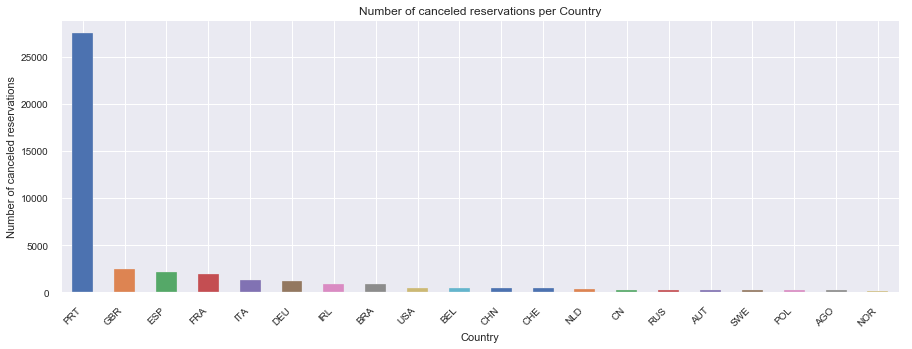

In [52]:
# Country were the guests who canceled their reservations the most? (Top 20)

countries = dataset[dataset.is_canceled == 1].groupby('country').country.count().sort_values(ascending = False)
    
plt.figure(figsize = (15, 5))
ax = countries.head(20).plot(kind = 'bar')
ax.set_title('Number of canceled reservations per Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of canceled reservations')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

plt.savefig('./PPT_IMG/country_per_is_canceled_class-3')
plt.show()

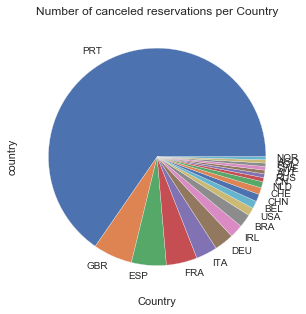

In [53]:
# Country were the guests who canceled their reservations the most? (Top 20)

countries = dataset[dataset.is_canceled == 1].groupby('country').country.count().sort_values(ascending = False)
    
plt.figure(figsize = (15, 5))
ax = countries.head(20).plot(kind = 'pie')
ax.set_title('Number of canceled reservations per Country')
ax.set_xlabel('Country')

plt.savefig('./PPT_IMG/country_per_is_canceled_class-4')
plt.show()

#### [[ Lead Time Analysis]]
> Any difference in lead time? __Median: 69__ For cancellations the median is much higher.

In [54]:
# Lead Time Statistics
dataset['lead_time'].describe()

count    119389.000000
mean        104.011994
std         106.863358
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

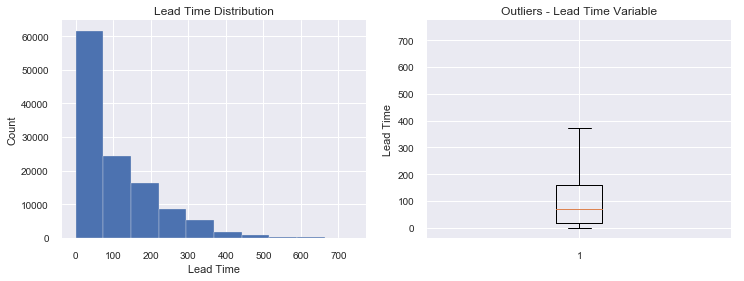

In [55]:
# Lead Time Distribution

fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['lead_time'])
ax1.set_title('Lead Time Distribution')
ax1.set_xlabel('Lead Time')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['lead_time'])
ax2.set_title('Outliers - Lead Time Variable')
ax2.set_ylabel('Lead Time')

plt.savefig('./PPT_IMG/lead_time_distribution-1')
plt.show()

__Lead Time Analysis by Cancellations__

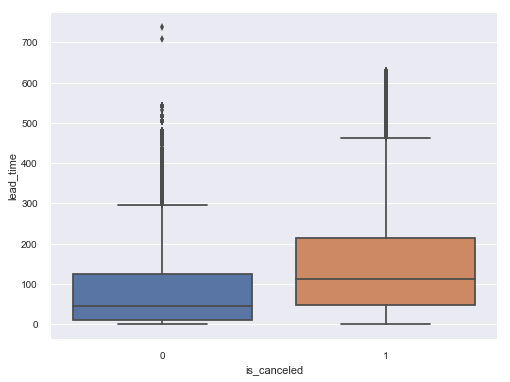

In [56]:
# Lead Time by is_canceled class
fig = plt.figure(figsize=(8,6)) 
sns.boxplot(x='is_canceled', y='lead_time', data=dataset)

plt.savefig('./PPT_IMG/lead_time_distribution-2')
plt.show()

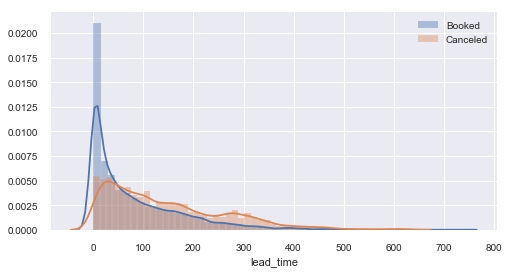

In [57]:
# Comparing distributions between Bookings and Cancellations
fig = plt.figure(figsize=(8,4)) 

sns.distplot(dataset['lead_time'][dataset['is_canceled']==0], label='Booked')
sns.distplot(dataset['lead_time'][dataset['is_canceled']==1], label='Canceled')

plt.legend()
plt.savefig('./PPT_IMG/lead_time_distribution-3')
plt.show()

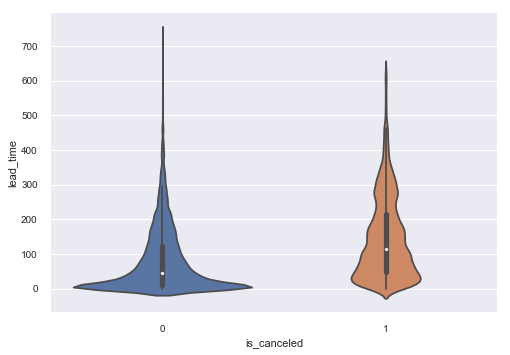

In [58]:
# Create the violinplot.
sns.violinplot(x=dataset['is_canceled'], y=dataset['lead_time'], data=dataset);

> Longer lead times contribute to increase in cancellations.

In [59]:
# Create Lead time Bins/Categories in dataset
leadTime_bins = np.array([0,30,800])  
dataset["leadTime_catg"] = pd.cut(dataset['lead_time'], leadTime_bins)
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,day_of_week,leadTime_catg
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,"(30, 800]"
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,"(30, 800]"
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,3,"(0, 30]"
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,3,"(0, 30]"
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,4,"(0, 30]"


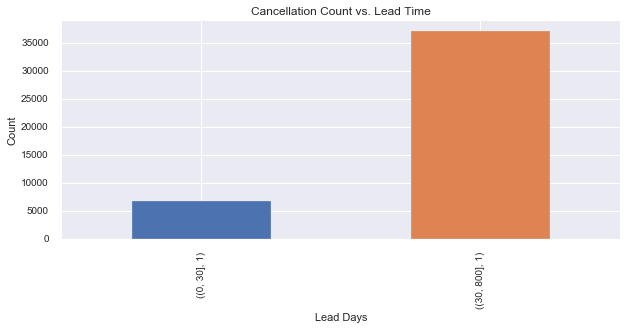

In [60]:
# Plot Lead time for Cancellations (Count)
df_cancl = dataset.loc[dataset['is_canceled']==1]

df_leadTime_cancl = df_cancl.groupby(['leadTime_catg'])['is_canceled'].value_counts(normalize=False) # value_counts(normalize=True)
df_leadTime_cancl.plot(kind='bar',stacked=False, legend=False,figsize=(10, 4))
plt.title('Cancellation Count vs. Lead Time')
plt.xlabel('Lead Days')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/lead_time_catg_cancl_count')
plt.show()

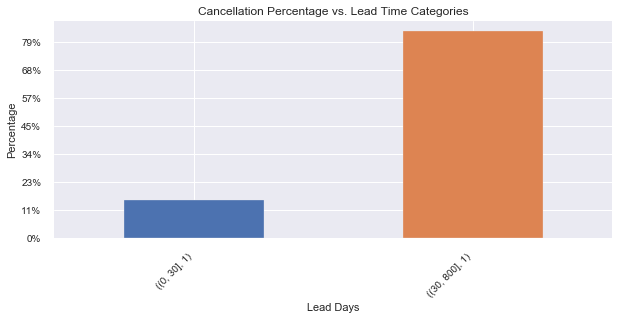

In [61]:
# Plot Lead time for Cancellations (Percentage)
from matplotlib import ticker

df_leadTime_cancl = df_cancl.groupby(['leadTime_catg'])['is_canceled'].value_counts(normalize=False) # value_counts(normalize=True)
ax = df_leadTime_cancl.plot(kind='bar',stacked=False, legend=False,figsize=(10, 4))
ax.set_title('Cancellation Percentage vs. Lead Time Categories')
ax.set_xlabel('Lead Days')
ax.set_ylabel('Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_cancl)))  # To covert count(default) to percentage

plt.savefig('./PPT_IMG/lead_time_catg_cancl_percent')
plt.show()

__Lead Time Analysis by Market Segment__

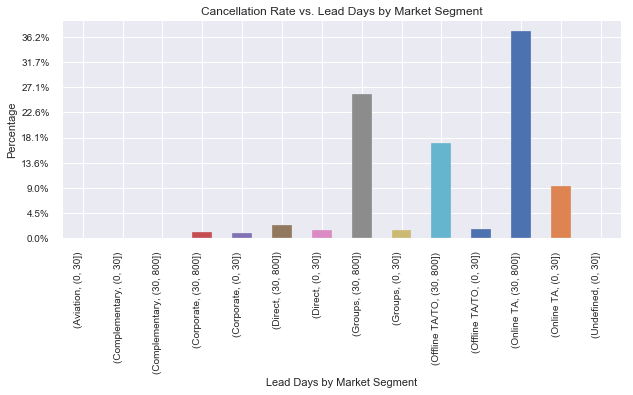

In [62]:
# Plot Cancellations by Mkt Segment and Lead time Catg (Percentage)
from matplotlib import ticker

df_ms_leadTime_cancl = df_cancl.groupby(['market_segment'])['leadTime_catg'].value_counts(normalize=False) # value_counts(normalize=True)
ax = df_ms_leadTime_cancl.plot(kind='bar',stacked=True, legend=False,figsize=(10, 4))
ax.set_title('Cancellation Rate vs. Lead Days by Market Segment')
ax.set_xlabel('Lead Days by Market Segment')
ax.set_ylabel('Percentage')
ax.set_xticklabels(ax.get_xticklabels(),  horizontalalignment = 'right')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_cancl)))  # To covert count(default) to percentage

plt.savefig('./PPT_IMG/MktSeg_leadTime_per_is_canceled-3')
plt.show()

In [63]:
# Cancellation by Market Segment by Lead time (Count)
print(df_ms_leadTime_cancl)

market_segment  leadTime_catg
Aviation        (0, 30]             46
Complementary   (0, 30]             53
                (30, 800]           18
Corporate       (30, 800]          517
                (0, 30]            438
Direct          (30, 800]         1068
                (0, 30]            698
Groups          (30, 800]        11446
                (0, 30]            643
Offline TA/TO   (30, 800]         7544
                (0, 30]            711
Online TA       (30, 800]        16445
                (0, 30]           4164
Undefined       (0, 30]              2
Name: leadTime_catg, dtype: int64


In [64]:
# Create Lead time Bins/Categories in dataset
leadTime_bins = np.array([0,2,3,4,5,9,14,30,60,90,120,150,180,270,365,800]) 
dataset["leadTime_catg_2"] = pd.cut(dataset['lead_time'], leadTime_bins)
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,day_of_week,leadTime_catg,leadTime_catg_2
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,"(30, 800]","(270, 365]"
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,"(30, 800]","(365, 800]"
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,3,"(0, 30]","(5, 9]"
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,3,"(0, 30]","(9, 14]"
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,4,"(0, 30]","(9, 14]"


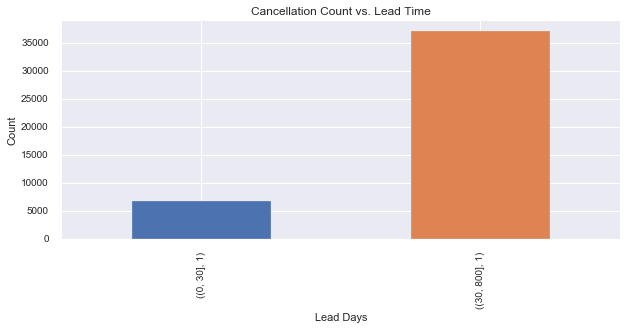

In [65]:
# Plot lead time for Cancellations -- COUNT
df_cancl = dataset.loc[dataset['is_canceled']==1]

df_leadTime_is_cancl = df_cancl.groupby(['leadTime_catg'])['is_canceled'].value_counts(normalize=False) # value_counts(normalize=True)
df_leadTime_is_cancl.plot(kind='bar',stacked=False, legend=False,figsize=(10, 4))
plt.title('Cancellation Count vs. Lead Time')
plt.xlabel('Lead Days')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/lead_time_catg_cancl_count')
plt.show()

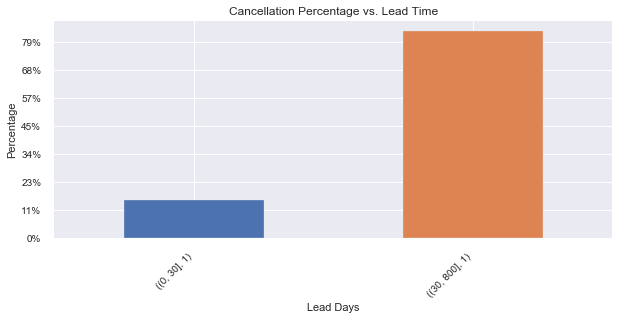

In [66]:
# Plot lead time for Cancellations  -- PERCENTAGE
from matplotlib import ticker

df_leadTime_is_cancl = df_cancl.groupby(['leadTime_catg'])['is_canceled'].value_counts(normalize=False) # value_counts(normalize=True)
ax = df_leadTime_is_cancl.plot(kind='bar',stacked=False, legend=False,figsize=(10, 4))
ax.set_title('Cancellation Percentage vs. Lead Time')
ax.set_xlabel('Lead Days')
ax.set_ylabel('Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df_cancl)))  # To covert count(default) to percentage

plt.savefig('./PPT_IMG/lead_time_catg_cancl_percent')
plt.show()

In [67]:
print(df_leadTime_is_cancl)
df_cancl['leadTime_catg'].value_counts(normalize=True)

leadTime_catg  is_canceled
(0, 30]        1               6755
(30, 800]      1              37038
Name: is_canceled, dtype: int64


(30, 800]    0.845752
(0, 30]      0.154248
Name: leadTime_catg, dtype: float64

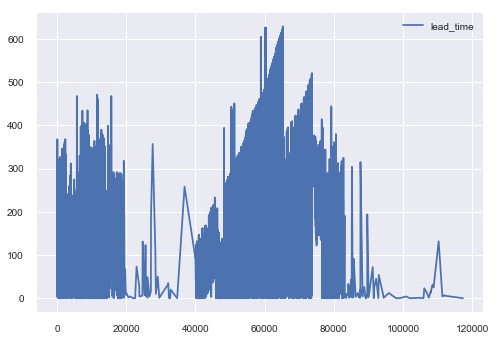

In [68]:
df_cancl.plot(kind='line', y='lead_time');

> __Note__: 
- leadTime_catg  is_canceled
- (0, 30]          1               6755
- (30, 800]        1              37039
- Name: is_canceled, dtype: int64
- Number of rows = 44224
- (30, 800]    0.845755
- (0, 30]      0.154245
- Name: leadTime_catg, dtype: float64

#### Hotel Pricing based on Lead Analysis

In [69]:
# Hotel Pricing information based on lead time
dataset[dataset['lead_time']<=18]['adr'].describe()

count    30260.000000
mean        95.672351
std         53.275445
min          0.000000
25%         60.000000
50%         89.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

In [70]:
# Hotel Pricing information based on lead time
dataset[(dataset['lead_time']>18) & (dataset['lead_time']<=69)]['adr'].describe()

count    29638.000000
mean       107.293724
std         50.681623
min          0.000000
25%         74.800000
50%         97.000000
75%        132.900000
max        437.000000
Name: adr, dtype: float64

In [71]:
# Hotel Pricing information based on lead time
dataset[(dataset['lead_time']>69) & (dataset['lead_time']<=160)]['adr'].describe()

count    29669.000000
mean       107.969201
std         46.394004
min          0.000000
25%         76.500000
50%         99.900000
75%        130.000000
max        451.500000
Name: adr, dtype: float64

In [72]:
# Hotel Pricing information based on lead time
dataset[(dataset['lead_time']>160) & (dataset['lead_time']<=365)]['adr'].describe()

count    26674.000000
mean        98.439073
std         40.558451
min         -6.380000
25%         68.000000
50%         93.500000
75%        117.000000
max        383.000000
Name: adr, dtype: float64

In [73]:
# Hotel Pricing information based on lead time
dataset[(dataset['lead_time']>365)]['adr'].describe()

count    3148.000000
mean       78.811569
std        24.981308
min         0.000000
25%        62.000000
50%        67.000000
75%        90.000000
max       450.000000
Name: adr, dtype: float64

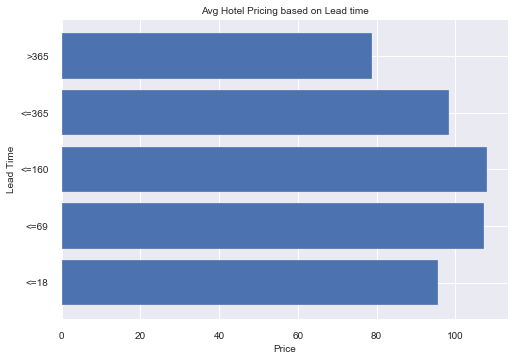

In [74]:
# Hotel Pricing information based on lead time
X = ['<=18', '<=69', '<=160', '<=365', '>365']
y = [dataset[dataset['lead_time']<=18]['adr'].mean(),
     dataset[(dataset['lead_time']>18) & (dataset['lead_time']<=69)]['adr'].mean(),
     dataset[(dataset['lead_time']>69) & (dataset['lead_time']<=160)]['adr'].mean(),
     dataset[(dataset['lead_time']>160) & (dataset['lead_time']<=365)]['adr'].mean(),
     dataset[dataset['lead_time']>365]['adr'].mean()]
plt.barh(X,y) #, color=("blue","gray"))
plt.ylabel("Lead Time", fontsize=10)
plt.xlabel("Price", fontsize=10)
plt.title("Avg Hotel Pricing based on Lead time", fontsize=10)
    
plt.show();

#### Average Daily Rate (ADR) Analysis
> How much do guests pay for a room per night? __AVG: $101/nt__

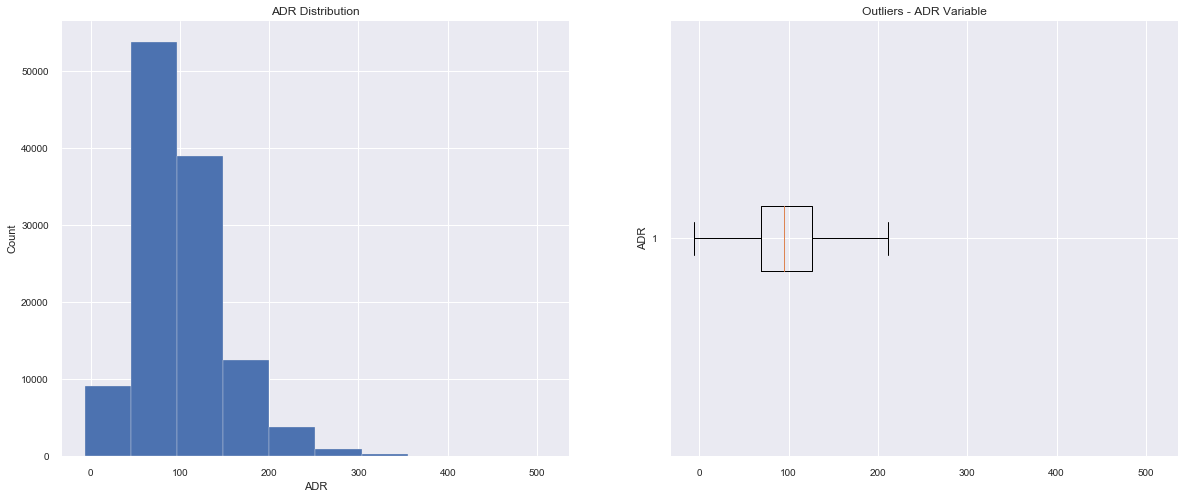

In [75]:
# ADR Distribution

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['adr'])
ax1.set_title('ADR Distribution')
ax1.set_xlabel('ADR')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['adr'], vert=False)
ax2.set_title('Outliers - ADR Variable')
ax2.set_ylabel('ADR')

plt.savefig('./PPT_IMG/adr_distribution-1')
plt.show()

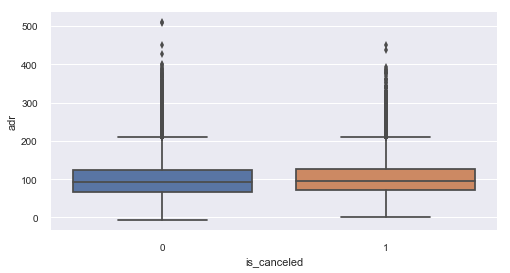

In [76]:
fig = plt.figure(figsize=(8,4)) 
sns.boxplot(x='is_canceled', y='adr', data=dataset)

plt.savefig('./PPT_IMG/adr_distribution-2')
plt.show()

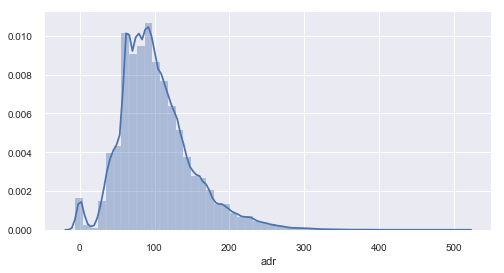

In [77]:
fig = plt.figure(figsize=(8,4)) 
sns.distplot(dataset['adr'])

plt.savefig('./PPT_IMG/adr_distribution-3')
plt.show()

In [78]:
# ADR Statistics
dataset['adr'].describe()

count    119389.000000
mean        101.786744
std          48.153554
min          -6.380000
25%          69.290000
50%          94.560000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

#### Total Special Requests Analysis

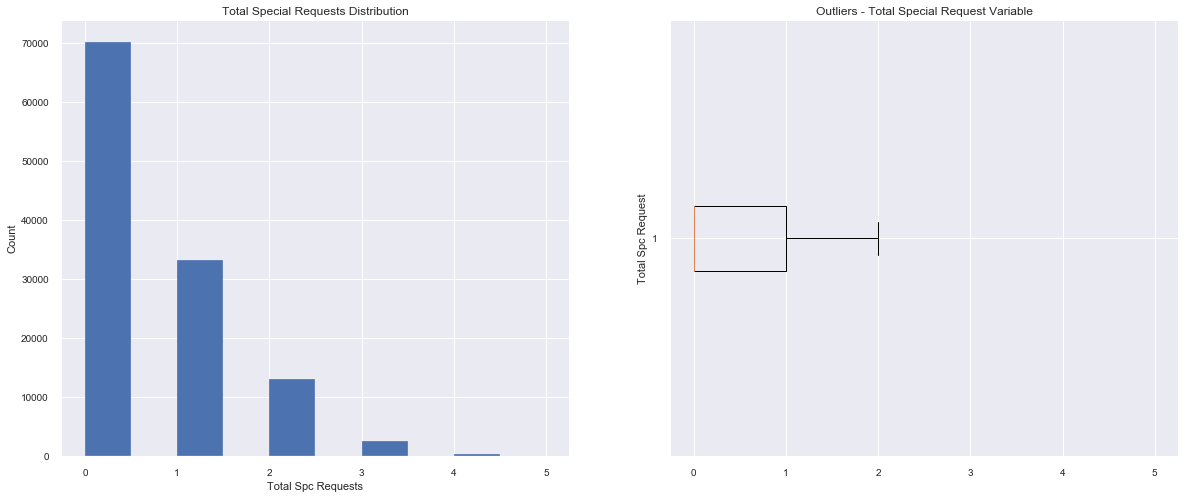

In [79]:
# Total Special Requests

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['total_of_special_requests'])
ax1.set_title('Total Special Requests Distribution')
ax1.set_xlabel('Total Spc Requests')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['total_of_special_requests'], vert=False)
ax2.set_title('Outliers - Total Special Request Variable')
ax2.set_ylabel('Total Spc Request')

plt.savefig('./PPT_IMG/ttl_spc_req_distribution-1')
plt.show()

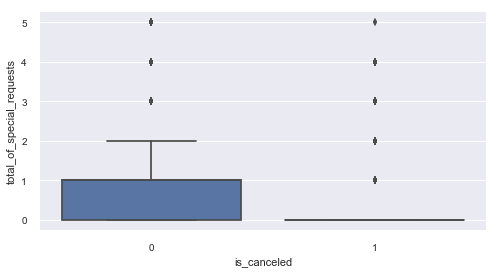

In [80]:
fig = plt.figure(figsize=(8,4)) 
sns.boxplot(x='is_canceled', y='total_of_special_requests', data=dataset)

plt.savefig('./PPT_IMG/ttl_spc_req_distribution-2')
plt.show()

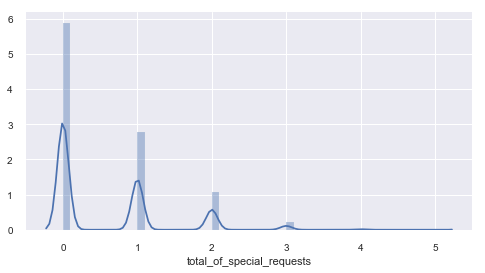

In [81]:
fig = plt.figure(figsize=(8,4)) 
sns.distplot(dataset['total_of_special_requests'])

plt.savefig('./PPT_IMG/ttl_spc_req_distribution-3')
plt.show()

#### Previous Cancellations Analysis

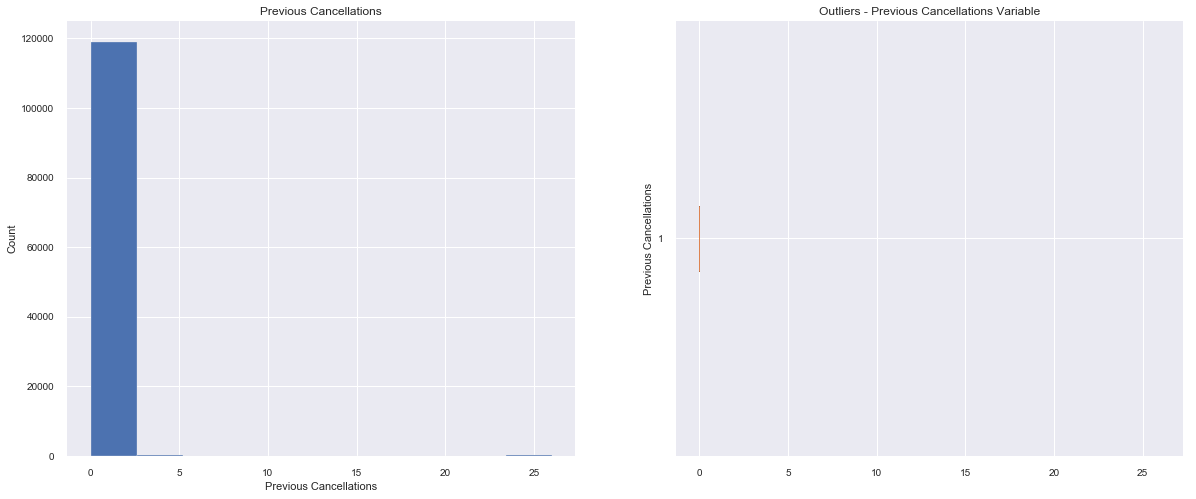

In [82]:
# Previous Cancellations Distribution

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['previous_cancellations'])
ax1.set_title('Previous Cancellations')
ax1.set_xlabel('Previous Cancellations')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['previous_cancellations'], vert=False)
ax2.set_title('Outliers - Previous Cancellations Variable')
ax2.set_ylabel('Previous Cancellations')

plt.savefig('./PPT_IMG/previous_cancellations_distribution-1')
plt.show()

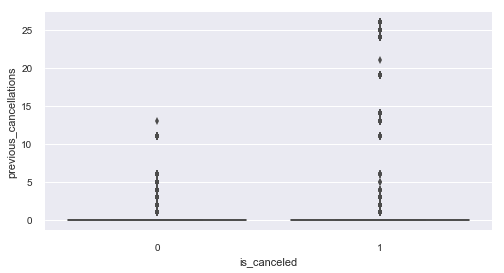

In [83]:
fig = plt.figure(figsize=(8,4)) 
sns.boxplot(x='is_canceled', y='previous_cancellations', data=dataset)

plt.savefig('./PPT_IMG/previous_cancellations_distribution-2')
plt.show()

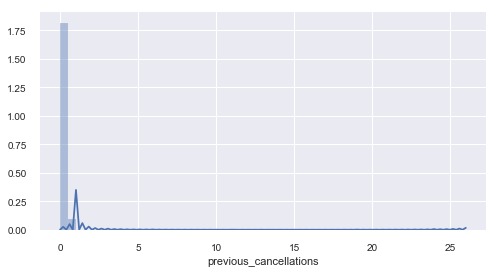

In [84]:
fig = plt.figure(figsize=(8,4)) 
sns.distplot(dataset['previous_cancellations'])

plt.savefig('./PPT_IMG/previous_cancellations_distribution-3')
plt.show()

#### Stays in Week Nights Analysis
> Insights? __Longer stays are seen in the Resorts__

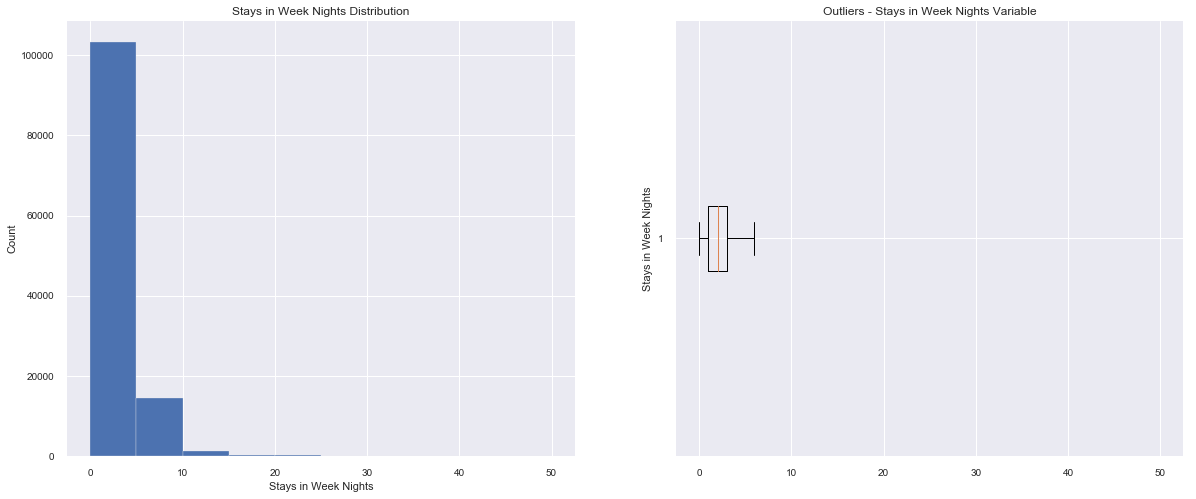

In [85]:
# Stays in Week Nights

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['stays_in_week_nights'])
ax1.set_title('Stays in Week Nights Distribution')
ax1.set_xlabel('Stays in Week Nights')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['stays_in_week_nights'], vert=False)
ax2.set_title('Outliers - Stays in Week Nights Variable')
ax2.set_ylabel('Stays in Week Nights')

plt.savefig('./PPT_IMG/stays_in_week_nights_distribution-1')
plt.show()

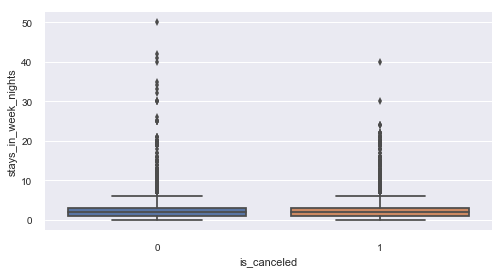

In [86]:
fig = plt.figure(figsize=(8,4)) 
sns.boxplot(x='is_canceled', y='stays_in_week_nights', data=dataset)

plt.savefig('./PPT_IMG/stays_in_week_nights_distribution-2')
plt.show()

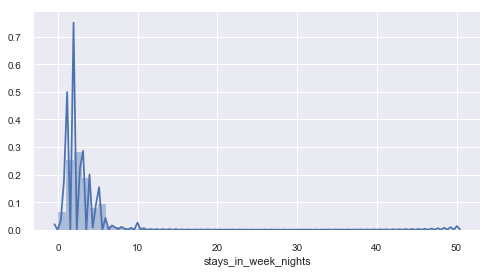

In [87]:
fig = plt.figure(figsize=(8,4)) 
sns.distplot(dataset['stays_in_week_nights'])

plt.savefig('./PPT_IMG/stays_in_week_nights_distribution-3')
plt.show()

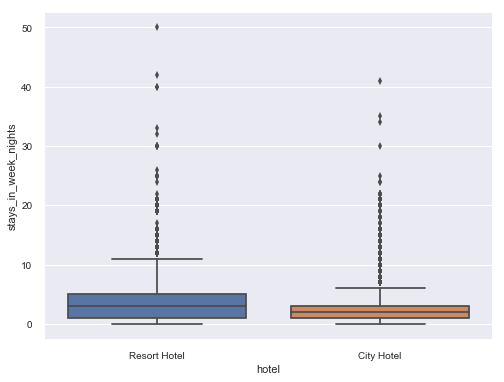

In [88]:
# Plot count of hotel stays_in_week_nights 
fig = plt.figure(figsize=(8,6)) 
sns.boxplot(x='hotel', y='stays_in_week_nights', data=dataset)

plt.savefig('./PPT_IMG/hotel_stays_week_nts')
plt.show()

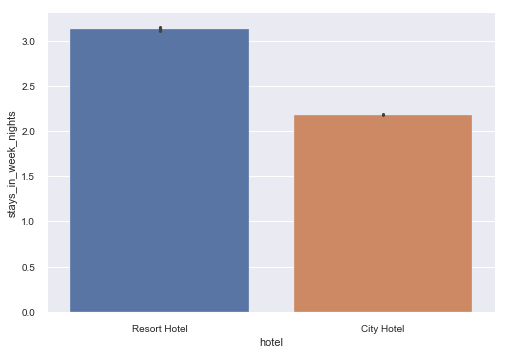

In [89]:
# Plot count of hotel stays_in_week_nights 
sns.barplot(x='hotel', y='stays_in_week_nights', data=dataset)
plt.savefig('./PPT_IMG/hotel_stays_week_nts-2')
plt.show()

#### Arrival Date Week Number Analysis

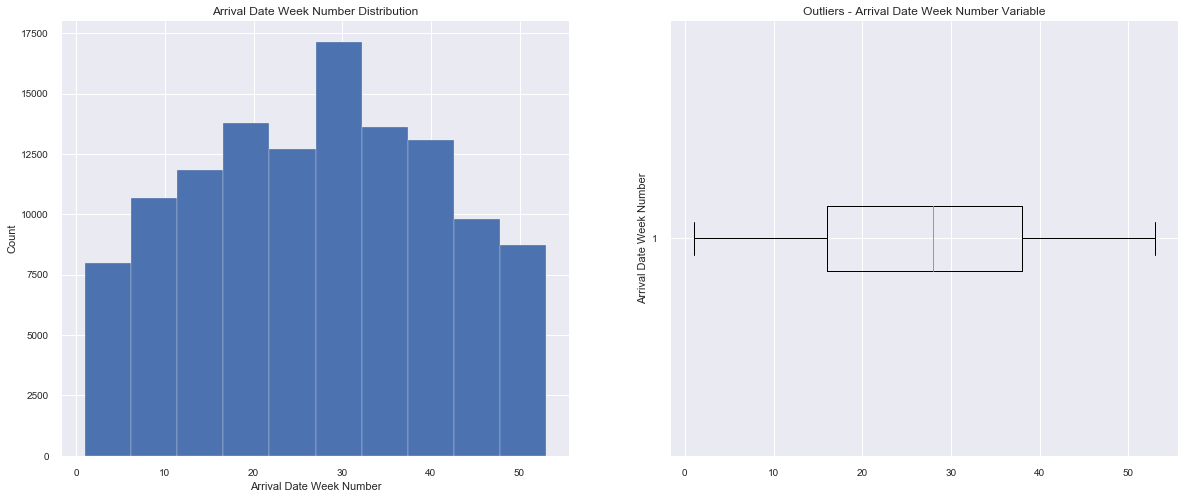

In [90]:
# Stays in Week Nights

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['arrival_date_week_number'])
ax1.set_title('Arrival Date Week Number Distribution')
ax1.set_xlabel('Arrival Date Week Number')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['arrival_date_week_number'], vert=False)
ax2.set_title('Outliers - Arrival Date Week Number Variable')
ax2.set_ylabel('Arrival Date Week Number')

plt.savefig('./PPT_IMG/arrival_date_week_number_distribution-1')
plt.show()

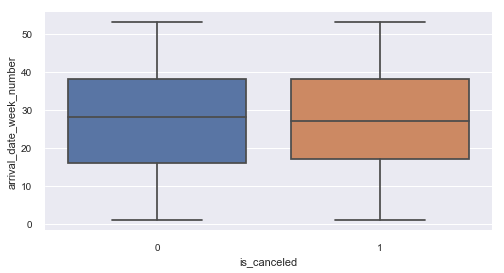

In [91]:
fig = plt.figure(figsize=(8,4)) 
sns.boxplot(x='is_canceled', y='arrival_date_week_number', data=dataset)

plt.savefig('./PPT_IMG/arrival_date_week_number_distribution-2')
plt.show()

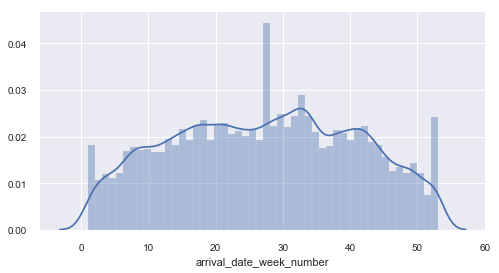

In [92]:
fig = plt.figure(figsize=(8,4)) 
sns.distplot(dataset['arrival_date_week_number'])

plt.savefig('./PPT_IMG/arrival_date_week_number_distribution-3')
plt.show()

#### Stays in Weekend Nights Analysis

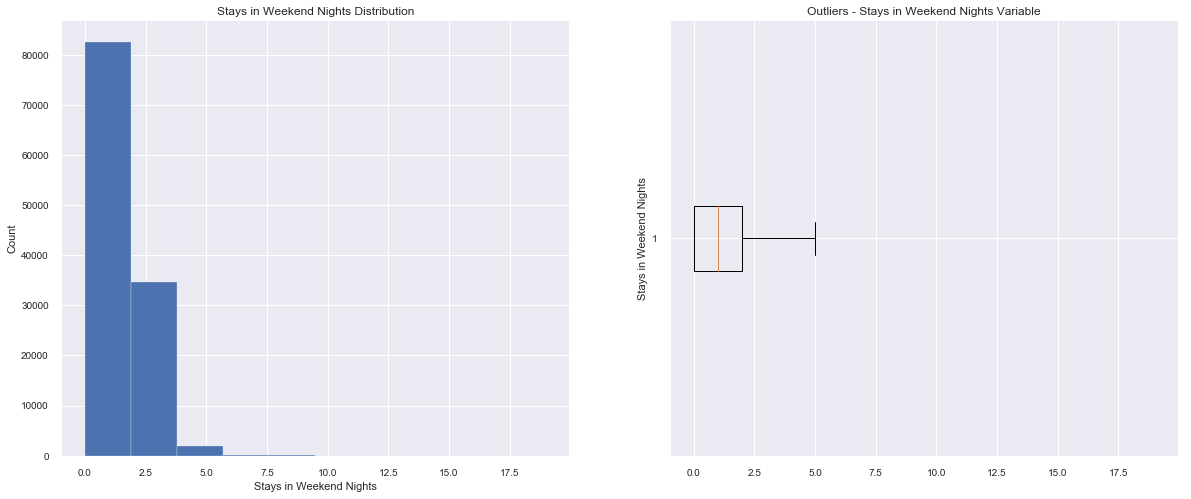

In [93]:
# Stays in Weekend Nights

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['stays_in_weekend_nights'])
ax1.set_title('Stays in Weekend Nights Distribution')
ax1.set_xlabel('Stays in Weekend Nights')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['stays_in_weekend_nights'], vert=False)
ax2.set_title('Outliers - Stays in Weekend Nights Variable')
ax2.set_ylabel('Stays in Weekend Nights')

plt.savefig('./PPT_IMG/stays_in_weekend_nights_distribution-1')
plt.show()

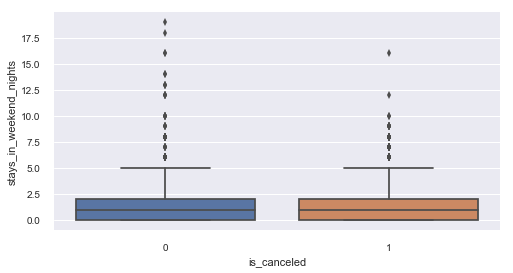

In [94]:
fig = plt.figure(figsize=(8,4)) 
sns.boxplot(x='is_canceled', y='stays_in_weekend_nights', data=dataset)

plt.savefig('./PPT_IMG/stays_in_weekend_nights_distribution-2')
plt.show()

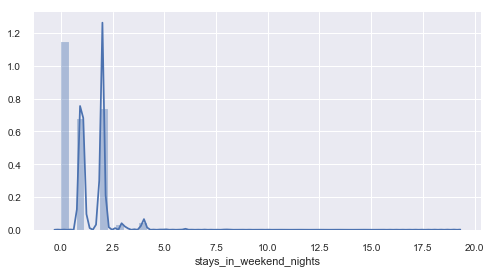

In [95]:
fig = plt.figure(figsize=(8,4)) 
sns.distplot(dataset['stays_in_weekend_nights'])

plt.savefig('./PPT_IMG/stays_in_weekend_nights_distribution-3')
plt.show()

#### Arrival Date Day of Month Analysis

> What is the busiest part of the month?
 - Middle of the month around the 15th-17th, followed by 25th and 26th towards the end of the month.

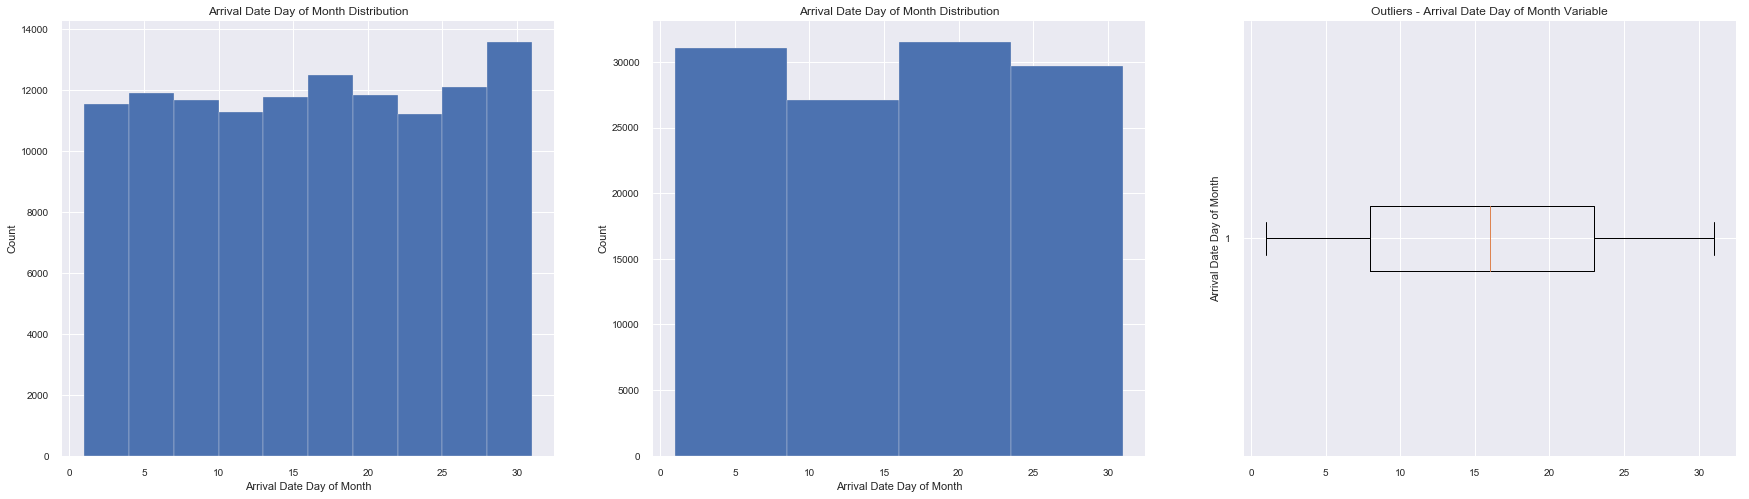

In [96]:
# Arrival Date Day of Month

fig = plt.figure(figsize=(30,8))
ax1 = plt.subplot(1,3,1)
ax1.hist(dataset['arrival_date_day_of_month'])
ax1.set_title('Arrival Date Day of Month Distribution')
ax1.set_xlabel('Arrival Date Day of Month')
ax1.set_ylabel('Count')

ax2 = plt.subplot(1,3,2)
ax2.hist(dataset['arrival_date_day_of_month'], bins=4)
ax2.set_title('Arrival Date Day of Month Distribution')
ax2.set_xlabel('Arrival Date Day of Month')
ax2.set_ylabel('Count')

ax3 = plt.subplot(1,3,3)
ax3.boxplot(dataset['arrival_date_day_of_month'], vert=False)
ax3.set_title('Outliers - Arrival Date Day of Month Variable')
ax3.set_ylabel('Arrival Date Day of Month')

plt.savefig('./PPT_IMG/arrival_date_day_of_month_distribution-1')
plt.show()

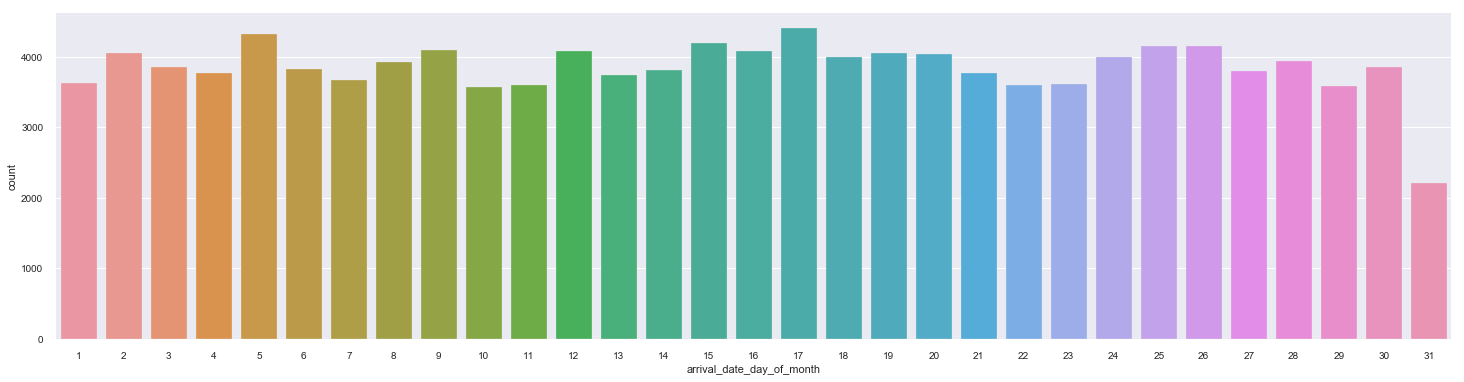

In [97]:
# Arrival Date Day of Month Counts
fig = plt.figure(figsize=(25,6))
sns.countplot(dataset['arrival_date_day_of_month'], orient='h')

plt.savefig('./PPT_IMG/arrival_date_day_of_month__distribution')
plt.show()

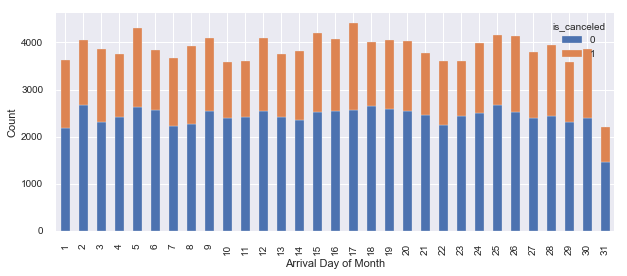

In [98]:
# Plot percentage of Arrival Date Day of Month by Cancellations and Bookings
df_distchan_canceled = dataset.groupby(['arrival_date_day_of_month'])['is_canceled'].value_counts(normalize=False).unstack()
df_distchan_canceled.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Arrival Day of Month')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/arrival_date_day_of_month_distribution-4')
plt.show()

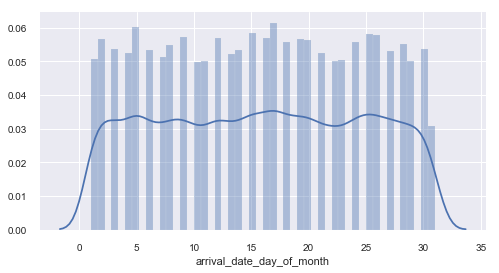

In [99]:
fig = plt.figure(figsize=(8,4)) 
sns.distplot(dataset['arrival_date_day_of_month'])

plt.savefig('./PPT_IMG/arrival_date_day_of_month_distribution-3')
plt.show()

In [100]:
dataset['arrival_date_day_of_month'].value_counts(normalize = True)

17    0.036905
5     0.036159
15    0.035146
25    0.034836
26    0.034735
9     0.034308
12    0.034233
16    0.034157
2     0.033965
19    0.033939
20    0.033772
18    0.033521
24    0.033445
28    0.033052
8     0.032842
3     0.032289
30    0.032273
6     0.032105
14    0.031988
27    0.031845
21    0.031552
4     0.031519
13    0.031368
7     0.030698
1     0.030371
23    0.030288
11    0.030145
22    0.030120
29    0.029986
10    0.029944
31    0.018494
Name: arrival_date_day_of_month, dtype: float64

#### Day of the Week  Analysis

> __Which day of the week has the most bookings?__
- __Answer:__  Sunday

> __Which day of the week has the most cancellations?__
- __Answer:__  Wednesday and Mondays

> __Which day of the week has the least cancellations?__
- __Answer:__  Weekend (Saturday and Sunday)

> __Which day(s) of the week are the most busiest?__
- __Answer:__  Monday followed by Thursday

> __Which day(s) of the week are the least busiest?__
- __Answer:__  Saturday

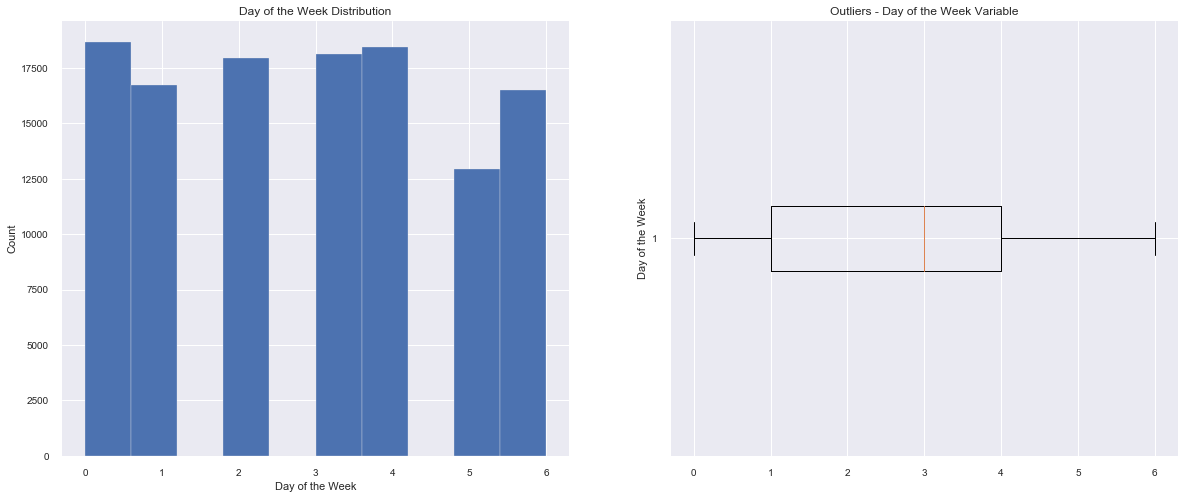

In [101]:
# Day of the Week

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['day_of_week'])
ax1.set_title('Day of the Week Distribution')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['day_of_week'], vert=False)
ax2.set_title('Outliers - Day of the Week Variable')
ax2.set_ylabel('Day of the Week')

plt.savefig('./PPT_IMG/day_of_week_distribution-1')
plt.show()

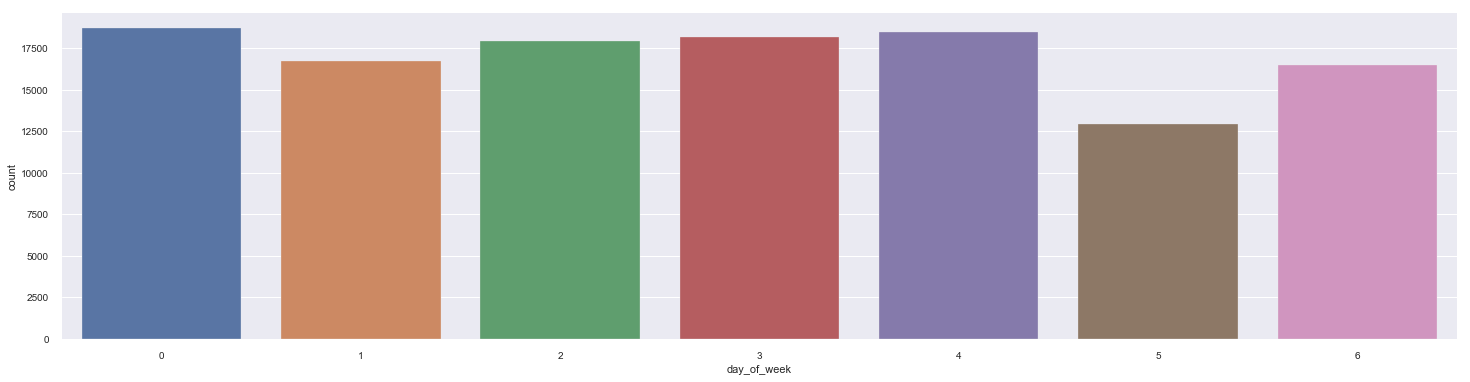

In [102]:
# Day of the Week Counts
fig = plt.figure(figsize=(25,6))
sns.countplot(dataset['day_of_week'], orient='h')

plt.savefig('./PPT_IMG/day_of_week__distribution')
plt.show()

> __Note:__ Day of week values are:  (0-Monday) to (6-Sunday)

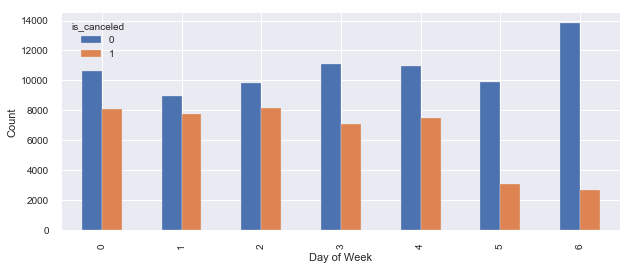

In [103]:
# Plot count of Day of Week by is_canceled class
df_dow_is_canceled = dataset.groupby(['day_of_week'])['is_canceled'].value_counts(normalize=False).unstack()
df_dow_is_canceled.plot(kind='bar',stacked=False, legend=True,figsize=(10, 4))
plt.xlabel('Day of Week')
plt.ylabel('Count')

plt.savefig('./PPT_IMG/day_of_week_per_is_canceled_class')
plt.show()

#### Agent Analysis

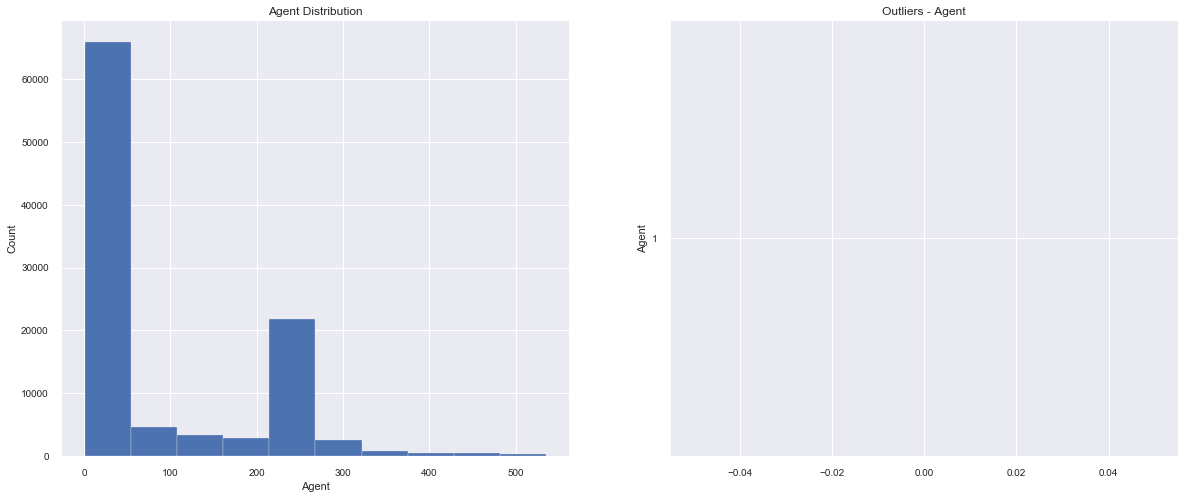

In [104]:
# Agent Distribution and Outliers

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['agent'])
ax1.set_title('Agent Distribution')
ax1.set_xlabel('Agent')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['agent'], vert=False)
ax2.set_title('Outliers - Agent')
ax2.set_ylabel('Agent')

plt.savefig('./PPT_IMG/agent_distribution-1')
plt.show()

#### Required Car Parking Spaces Analysis

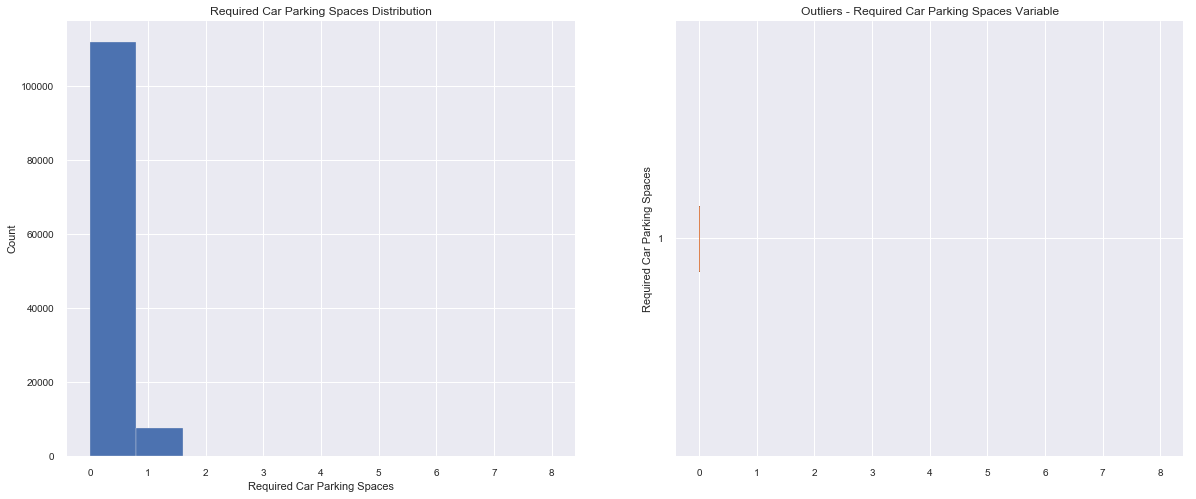

In [105]:
# Required Car Parking Spaces Distribution and Outliers

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['required_car_parking_spaces'])
ax1.set_title('Required Car Parking Spaces Distribution')
ax1.set_xlabel('Required Car Parking Spaces')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['required_car_parking_spaces'], vert=False)
ax2.set_title('Outliers - Required Car Parking Spaces Variable')
ax2.set_ylabel('Required Car Parking Spaces')

plt.savefig('./PPT_IMG/required_car_parking_spaces_distribution-1')
plt.show()

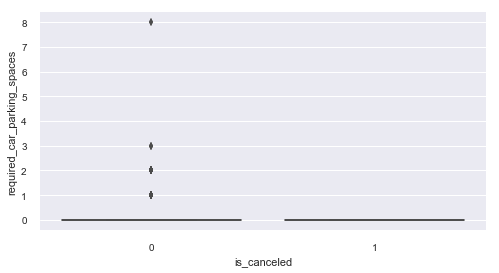

In [106]:
fig = plt.figure(figsize=(8,4)) 
sns.boxplot(x='is_canceled', y='required_car_parking_spaces', data=dataset)

plt.savefig('./PPT_IMG/required_car_parking_spaces_distribution-2')
plt.show()

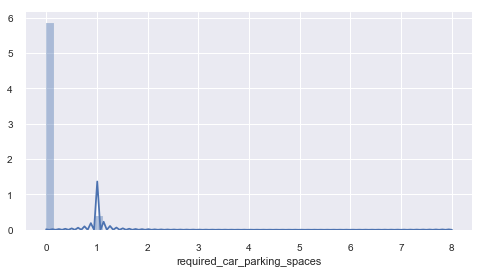

In [107]:
fig = plt.figure(figsize=(8,4)) 
sns.distplot(dataset['required_car_parking_spaces'])

plt.savefig('./PPT_IMG/required_car_parking_spaces_distribution-3')
plt.show()

In [108]:
# Required car parking spaces (Percentage)
dataset['required_car_parking_spaces'].value_counts(normalize=True)

0    0.937884
1    0.061840
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

#### Revenue Metrics Analysis
> What is the avg revenue loss on cancellations yearly? __5 Million/Yr__

In [109]:
# Add column for revenue given the # of days stayed and avg daily rate (adr)
dataset['revenue'] = (dataset['stays_in_week_nights'] + dataset['stays_in_weekend_nights']) * dataset['adr']
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,day_of_week,leadTime_catg,leadTime_catg_2,revenue
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,"(30, 800]","(270, 365]",0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,"(30, 800]","(365, 800]",0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,3,"(0, 30]","(5, 9]",75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,3,"(0, 30]","(9, 14]",75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,4,"(0, 30]","(9, 14]",196.0


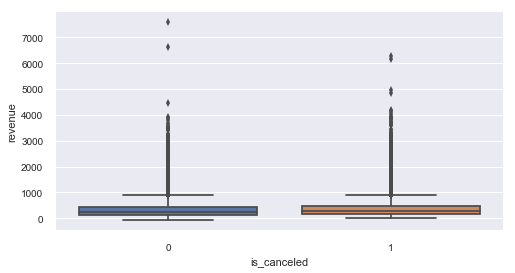

In [110]:
fig = plt.figure(figsize=(8,4)) 
sns.boxplot(x='is_canceled', y='revenue', data=dataset)

plt.savefig('./PPT_IMG/revenue_cancl')
plt.show()

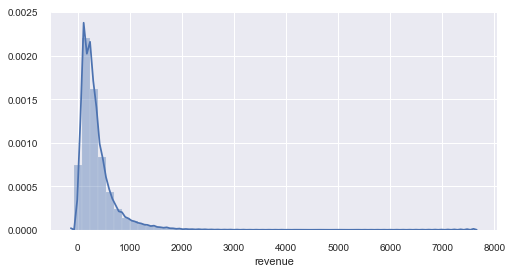

In [111]:
fig = plt.figure(figsize=(8,4)) 
sns.distplot(dataset['revenue'])

plt.savefig('./PPT_IMG/revenue_distribution')
plt.show()

In [112]:
# All Potential Revenue from all reservations
print(len(dataset))
rev_ttl = dataset['revenue'].sum()
rev_ttl

119389


42718097.53

In [113]:
# Revenue Generated from Successful Bookings
df_booked = dataset.loc[dataset['is_canceled']==0]

rev_booked = df_booked['revenue'].sum()
rev_booked

25996260.409999996

In [114]:
# Revenue Loss from Cancellations
df_cancl = dataset.loc[dataset['is_canceled']==1]

rev_loss_cancl = df_cancl['revenue'].sum()
rev_loss_cancl

16721837.120000001

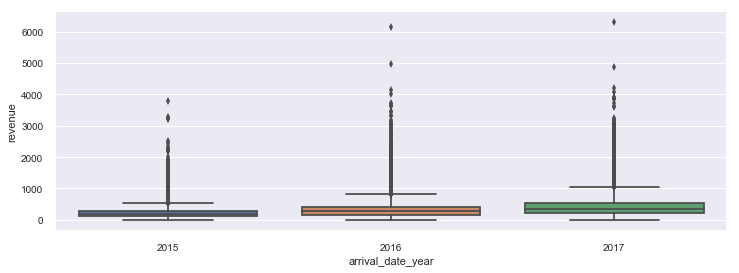

In [115]:
# Revenue by Year based on cancellations
fig = plt.figure(figsize=(12,4)) 
sns.boxplot(x='arrival_date_year', y='revenue', data=df_cancl)

plt.savefig('./PPT_IMG/adr_per_roomtype')
plt.show()

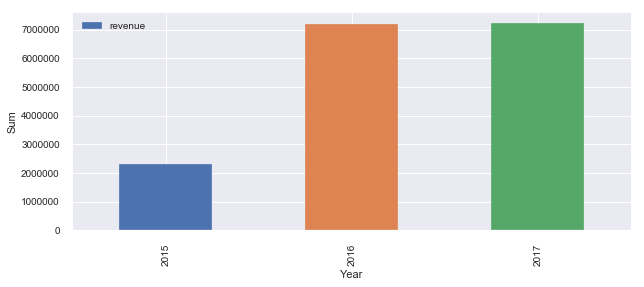

In [116]:
# Plot sum of revenue loss by year
df_rev_loss_yr = df_cancl.groupby(['arrival_date_year'])['revenue'].sum()
df_rev_loss_yr.plot(kind='bar',stacked=False, legend=True,figsize=(10, 4))
plt.xlabel('Year')
plt.ylabel('Sum')

plt.savefig('./PPT_IMG/revenue_loss_year-1')
plt.show()

In [117]:
df_rev_loss_yr.describe()

count    3.000000e+00
mean     5.573946e+06
std      2.829686e+06
min      2.306557e+06
25%      4.749129e+06
50%      7.191700e+06
75%      7.207640e+06
max      7.223580e+06
Name: revenue, dtype: float64

__Hotel Pricing per night__


In [118]:
# Avg stay per night based on booked reservations
# Revenue Generated from Successful Bookings
df_booked['revenue'].sum()/(df_booked['stays_in_week_nights'].sum() + df_booked['stays_in_weekend_nights'].sum())

101.93013021486824

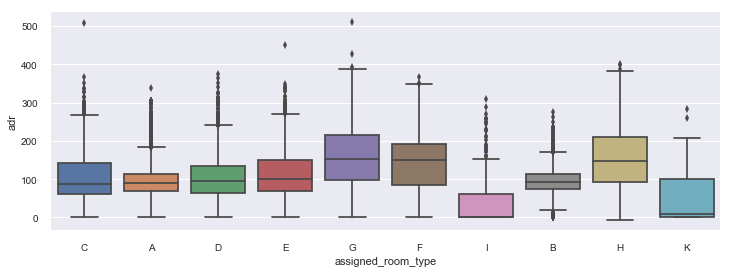

In [119]:
# Stay per night based on room type and booked reservations
fig = plt.figure(figsize=(12,4)) 
sns.boxplot(x='assigned_room_type', y='adr', data=df_booked)

plt.savefig('./PPT_IMG/adr_per_roomtype')
plt.show()

 __NOTE:__
- Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

# Future Work
- Given more time I would perform analysis on the following additional questions:
    - How does the price per night vary over the year?
    - How long do people stay at the hotels?
    - Any difference in market segments?
    - Where do most of the people come from that require a parking space?

In [120]:
end = datetime.datetime.now()
elapsed_time = end - start
print(f'EDA Total Execution Time: {elapsed_time}')

EDA Total Execution Time: 1:47:03.475643


# End Study